### **Software Code Solution and Report**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
# My 3 datasets (geographical, economic, and educational indicators)
df_education = pd.read_csv('/content/drive/MyDrive/Pandas coursework/Global Population 2023 - Global Population-3.csv', encoding='iso-8859-1')
df_global_population = pd.read_csv('/content/drive/MyDrive/Pandas coursework/Global_Education.csv', encoding='iso-8859-1')
df_world_data = pd.read_csv('/content/drive/MyDrive/Pandas coursework/world-data-2023.csv', encoding='iso-8859-1')

### **Data Processing & Cleaning**

In [5]:
# The actual representation of column names to understand its structure
print("Global Population Columns:", repr(df_global_population.columns.values))
print("Global Education Columns:", repr(df_education.columns.values))
print("World Data Columns:", repr(df_world_data.columns.values))

Global Population Columns: array(['Countries and areas', 'Latitude ', 'Longitude',
       'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
       'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
       'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
       'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female',
       'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male',
       'Youth_15_24_Literacy_Rate_Female', 'Birth_Rate',
       'Gross_Primary_Education_Enrol

In [6]:
# Clean up column names by removing newlines and stripping extra whitespace
df_global_population.columns = df_global_population.columns.str.replace('\n', '').str.strip()
df_education.columns = df_education.columns.str.replace('\n', '').str.strip()
df_world_data.columns = df_world_data.columns.str.replace('\n', '').str.strip()

In [7]:
# Rename the columns to 'Country'
# Update these strings based on the output of the repr function above
df_global_population.rename(columns={'Countries and areas': 'Country'}, inplace=True)
df_education.rename(columns={'Country (or dependency)': 'Country'}, inplace=True)
df_world_data.rename(columns={'Country': 'Country'}, inplace=True)

# Verify the renaming
print("Updated Population Columns:", df_global_population.columns)
print("Updated Education Columns:", df_education.columns)
print("Updated World Data Columns:", df_world_data.columns)

Updated Population Columns: Index(['Country', 'Latitude', 'Longitude', 'OOSR_Pre0Primary_Age_Male',
       'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male',
       'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male',
       'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male',
       'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gro

In [8]:
# Standardization of country names based on manuel findings
country_corrections = {
    "USA": "United States",
    "U.S.": "United States",
    "UK": "United Kingdom",
    "U.K.": "United Kingdom",
    "DR Congo": "Democratic Republic of the Congo",
    "Republic of Korea": "South Korea",
    "Russian Federation": "Russia",
    "Bolivarian Republic of Venezuela": "Venezuela",
    "Islamic Republic of Iran": "Iran",
    "North Macedonia": "Macedonia",
    "Plurinational State of Bolivia": "Bolivia",
    "Syrian Arab Republic": "Syria",
    "Lao People's Democratic Republic": "Laos",
    "Socialist Republic of Vietnam": "Vietnam",
    "Czech Republic (Czechia)": "Czech Republic",
    "Bahamas": "The Bahamas",
    "Palestinian National Authority": "State of Palestine",
    "Timor-Leste": "East Timor",
    "Côte d'Ivoire": "Ivory Coast",
    "Federated States of Micronesia": "Micronesia",
    "Holy See": "Vatican City"
}

# Applying corrections to country names for all datasets
def standardize_countries(df, country_col):
    df[country_col] = df[country_col].replace(country_corrections)
    return df

In [9]:
df_global_population = standardize_countries(df_global_population, 'Country') # Standardize country names in the global population dataset
df_education = standardize_countries(df_education, 'Country')  # Standardize country names in the global education dataset
df_world_data = standardize_countries(df_world_data, 'Country') # Standardize country names in the world data dataset

In [10]:
# Conducted an inner join merge to only keep rows with countries present in all datasets
df_merged = df_global_population.merge(df_education, on='Country', how='inner').merge(df_world_data, on='Country', how='inner')

In [11]:
# Get the unique list of countries from each DataFrame
countries_population = df_global_population['Country'].unique()
countries_education = df_education['Country'].unique()
countries_world_data = df_world_data['Country'].unique()

# Print the list of countries from each dataset in alphabetical order
print("Countries in Global Population dataset:", sorted(countries_population))
print("Countries in Education dataset:", sorted(countries_education))
print("Countries in World Data dataset:", sorted(countries_world_data))

Countries in Global Population dataset: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea0Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',

In [12]:
# Get the unique list of countries from each DataFrame and convert to sets
countries_population = set(df_global_population['Country'].unique())
countries_education = set(df_education['Country'].unique())
countries_world_data = set(df_world_data['Country'].unique())

# After merging, get a set of countries in the merged dataset
countries_merged = set(df_merged['Country'])

# Determine which countries were excluded
excluded_countries = (countries_population.union(countries_education, countries_world_data)) - countries_merged

# The number of countries excluded
print("Number of countries excluded from the final merged dataset:", len(excluded_countries))

Number of countries excluded from the final merged dataset: 59


In [13]:
# The result of the merged dataframes
print(df_merged.head())
print(f"Merged DataFrame has {len(df_merged)} records.")

       Country  Latitude_x  Longitude_x  OOSR_Pre0Primary_Age_Male  \
0  Afghanistan   33.939110    67.709953                          0   
1      Albania   41.153332    20.168331                          4   
2      Algeria   28.033886     1.659626                          0   
3      Andorra   42.506285     1.521801                          0   
4       Angola   11.202692    17.873887                         31   

   OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
0                            0                      0   
1                            2                      6   
2                            0                      0   
3                            0                      0   
4                           39                      0   

   OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male  \
0                        0                              0   
1                        3                              6   
2                        0                           

In [14]:
# Output the final DataFrame and the number of columns
print("Merged DataFrame has", len(df_merged), "records.")
print("Columns after merging:", len(df_merged.columns))

Merged DataFrame has 186 records.
Columns after merging: 74


In [15]:
# Check for missing data in each column of the DataFrame
missing_data = df_merged.isnull().sum()

# Print the number of missing values in each column
print("Missing data in each column:\n", missing_data)

# Check if any column has missing data at all
any_missing = missing_data[missing_data > 0]
if not any_missing.empty:
    print("Columns with missing data:\n", any_missing)
else:
    print("No missing data found in any column.")

Missing data in each column:
 Country                         0
Latitude_x                      0
Longitude_x                     0
OOSR_Pre0Primary_Age_Male       0
OOSR_Pre0Primary_Age_Female     0
                               ..
Total tax rate                 12
Unemployment rate              18
Urban_population                5
Latitude_y                      0
Longitude_y                     0
Length: 74, dtype: int64
Columns with missing data:
 Fert.Rate                                     1
Med.Age                                       1
Abbreviation                                  5
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            22
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%) 

In [16]:
import numpy as np


# Cleaning and conversion function
def clean_and_convert(column):
    if column.name == 'Country':
        # Directly return if the column is 'Country', assuming it's already in the correct form (string or category)
        return column.astype('category') if column.dtype == 'object' else column
    elif column.dtype == 'object':
        # Perform cleaning and conversion only on other object type columns
        column = column.str.replace('[\$\,\%]', '', regex=True).replace('', np.nan)
        column = pd.to_numeric(column, errors='coerce')
    return column

# DataFrame processing function
def process_dataframe(df):
    for col in df.columns:
        df[col] = clean_and_convert(df[col])  # Clean and convert applicable columns

    # Impute missing values for numerical columns except 'Country'
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        if df[col].notna().any():  # Ensure there's at least some non-NaN data
            median_value = df[col].median(skipna=True)  # Compute median safely
            df[col].fillna(median_value, inplace=True)
        else:
            print(f"All values in column '{col}' are NaN or non-numeric.")

    if df['Country'].isnull().any():
        print("Warning: 'Country' column contains missing values.")
    else:
        print("No missing values in 'Country' column.")

    return df

# Process the DataFrame
processed_df = process_dataframe(df_merged)

# Verify results
print(processed_df.isnull().sum())

All values in column 'Abbreviation' are NaN or non-numeric.
All values in column 'Capital/Major City' are NaN or non-numeric.
All values in column 'Currency-Code' are NaN or non-numeric.
All values in column 'Largest city' are NaN or non-numeric.
All values in column 'Official language' are NaN or non-numeric.
No missing values in 'Country' column.
Country                        0
Latitude_x                     0
Longitude_x                    0
OOSR_Pre0Primary_Age_Male      0
OOSR_Pre0Primary_Age_Female    0
                              ..
Total tax rate                 0
Unemployment rate              0
Urban_population               0
Latitude_y                     0
Longitude_y                    0
Length: 74, dtype: int64


<ipython-input-16-a82eab49565a>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [ ]:
# df_merged is your DataFrame
numerical_columns = df_merged.select_dtypes(include=['float64', 'int64']).columns

print("Median values for numerical columns:")
for column in numerical_columns:
    if df_merged[column].notna().any():  # Check if there's at least one non-NaN value
        median_value = df_merged[column].median()
        print(f"Median of {column}: {median_value}")
    else:
        print(f"No valid values in column '{column}' to calculate a median since is a non-numeric value")

Median values for numerical columns:
Median of Latitude_x: 23.190858
Median of Longitude_x: 43.345096
Median of OOSR_Pre0Primary_Age_Male: 8.0
Median of OOSR_Pre0Primary_Age_Female: 7.0
Median of OOSR_Primary_Age_Male: 1.0
Median of OOSR_Primary_Age_Female: 1.0
Median of OOSR_Lower_Secondary_Age_Male: 2.0
Median of OOSR_Lower_Secondary_Age_Female: 2.0
Median of OOSR_Upper_Secondary_Age_Male: 15.0
Median of OOSR_Upper_Secondary_Age_Female: 12.0
Median of Completion_Rate_Primary_Male: 45.0
Median of Completion_Rate_Primary_Female: 40.5
Median of Completion_Rate_Lower_Secondary_Male: 25.0
Median of Completion_Rate_Lower_Secondary_Female: 20.5
Median of Completion_Rate_Upper_Secondary_Male: 12.0
Median of Completion_Rate_Upper_Secondary_Female: 9.0
Median of Grade_2_3_Proficiency_Reading: 0.0
Median of Grade_2_3_Proficiency_Math: 0.0
Median of Primary_End_Proficiency_Reading: 0.0
Median of Primary_End_Proficiency_Math: 0.0
Median of Lower_Secondary_End_Proficiency_Reading: 0.0
Median of Lo

In [ ]:
# List of columns to drop from the DataFrame to get rid of duplicates or redudancy data in preperation for the data analysis
columns_to_drop = [
    'Abbreviation', 'Currency-Code', 'Calling Code',
    'Capital/Major City', 'Latitude_x', 'Longitude_x',
    'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
    'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
    'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female'
    'Completion_Rate_Primary_Female',
    'Completion_Rate_Lower_Secondary_Male',
    'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female',
    'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
    'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
    'Lower_Secondary_End_Proficiency_Reading''Completion_Rate_Primary_Male',
    'Completion_Rate_Primary_Female',
    'Lower_Secondary_End_Proficiency_Math', '#',
    'Fertility Rate', 'Official language', 'Largest city', 'Unemployment rate',
    'Latitude_y','OOSR_Upper_Secondary_Age_Female',
    'Birth_Rate', 'Gasoline Price', 'Population',
    'Out of pocket health expenditure', 'Physicians per thousand', 'Population',
    'Longitude_y', 'Completion_Rate_Primary_Male',
    'Lower_Secondary_End_Proficiency_Reading', 'Density(P/KmÂ²)', 'NetChange',
    'YearlyChange', 'Youth_15_24_Literacy_Rate_Male',
    'Youth_15_24_Literacy_Rate_Female', 'WorldShare', 'CPI Change (%)',
    'Forested Area (%)', 'Gross_Primary_Education_Enrollment',
    'Gross_Tertiary_Education_Enrollment', 'Urban_population',
    'Maternal mortality ratio', 'Total tax rate',
    'Population: Labor force participation (%)', 'Land Area(KmÂ²)'
]

# Remove specified columns from df_merged directly, ignoring any errors if thecolumns do not exist.
df_merged.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Verify the columns have been dropped, keeping the dimensions that will compliment each other for the data analysis
print("Columns after cleaning:", df_merged.columns)

Columns after cleaning: Index(['Country', 'Unemployment_Rate', 'Population(2023)', 'Migrants(net)',
       'Fert.Rate', 'Med.Age', 'UrbanPop %', 'Density(P/Km2)',
       'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size',
       'Birth Rate', 'Co2-Emissions', 'CPI', 'GDP',
       'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Minimum wage', 'Tax revenue (%)'],
      dtype='object')


In [ ]:
print("Total number of columns:", len(df_merged.columns))

Total number of columns: 21


### **Data Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Upload my 3 datasets (geographical, economic, and educational indicators)
df_education = pd.read_csv('/content/drive/MyDrive/Pandas coursework/Global Population 2023 - Global Population-3.csv', encoding='iso-8859-1')
df_global_population = pd.read_csv('/content/drive/MyDrive/Pandas coursework/Global_Education.csv', encoding='iso-8859-1')
df_world_data = pd.read_csv('/content/drive/MyDrive/Pandas coursework/world-data-2023.csv', encoding='iso-8859-1')

In [ ]:
# 1. Descriptive Statistics
print("Descriptive Statistics for Numerical Columns:")
print(df_merged.describe())

Descriptive Statistics for Numerical Columns:
       Unemployment_Rate  Population(2023)  Migrants(net)   Fert.Rate  \
count         186.000000      1.860000e+02   1.860000e+02  186.000000   
mean            6.119624      4.278341e+07  -4.262688e+02    2.499462   
std             5.197126      1.530301e+08   1.905737e+05    1.193654   
min             0.000000      5.180000e+02  -9.104750e+05    0.900000   
25%             2.505000      2.356880e+06  -1.297075e+04    1.600000   
50%             4.590000      9.830207e+06  -2.000000e+03    2.100000   
75%             8.415000      3.406583e+07   8.875000e+02    3.175000   
max            28.180000      1.428628e+09   1.784718e+06    6.700000   

          Med.Age  UrbanPop %  Density(P/Km2)  Agricultural Land( %)  \
count  186.000000  186.000000      186.000000             186.000000   
mean    30.139785   59.112903      366.849462              38.889247   
std      9.464119   21.673826     2029.909725              21.512568   
min     

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files  # This line imports the files module from google.colab

# 'df_merged' is your DataFrame containing the merged data
# Generate descriptive statistics for numerical columns
descriptive_stats = df_merged.describe()

# Optionally, transpose the DataFrame for better readability if preferred
# descriptive_stats = descriptive_stats.T

# Save the descriptive statistics to a CSV file
descriptive_stats.to_csv('Descriptive_Statistics.csv', index=True)

print("Descriptive statistics saved to 'Descriptive_Statistics.csv'.")

# Use the files.download method to download the CSV file
files.download('Descriptive_Statistics.csv')

Descriptive statistics saved to 'Descriptive_Statistics.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Skewness of the data:
Unemployment_Rate                           1.339855
Population(2023)                            8.178577
Migrants(net)                               4.875500
Fert.Rate                                   1.234627
Med.Age                                     0.155711
UrbanPop %                                 -0.255789
Density(P/Km2)                             11.783507
Agricultural Land( %)                       0.107828
Land Area(Km2)                              5.453505
Armed Forces size                           5.341788
Birth Rate                                  0.651260
Co2-Emissions                               9.524715
CPI                                         9.544861
GDP                                         8.422847
Gross primary education enrollment (%)     -0.983546
Gross tertiary education enrollment (%)     0.668518
Infant mortality                            1.256163
Life expectancy                            -0.603802
Minimum wage           

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

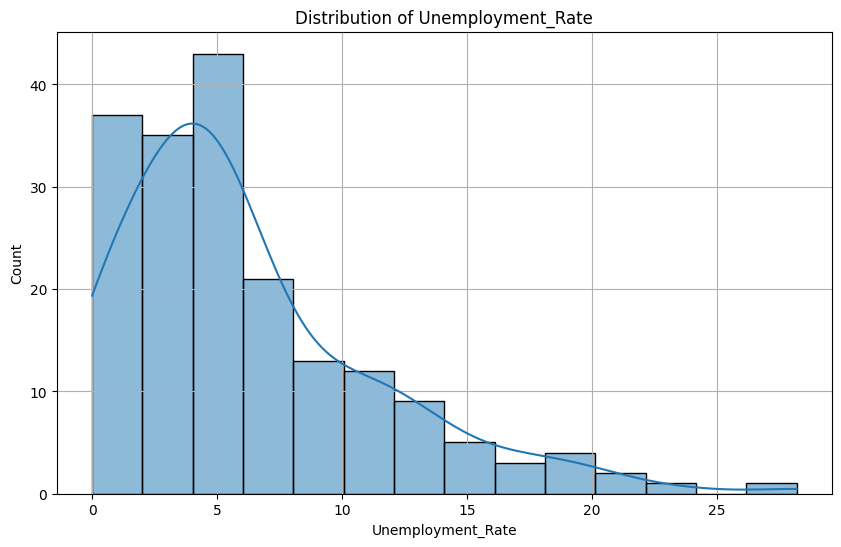

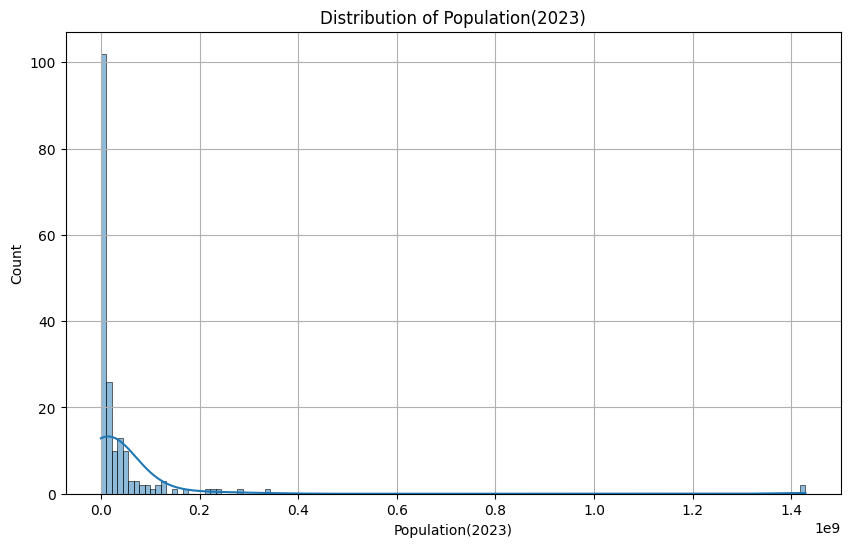

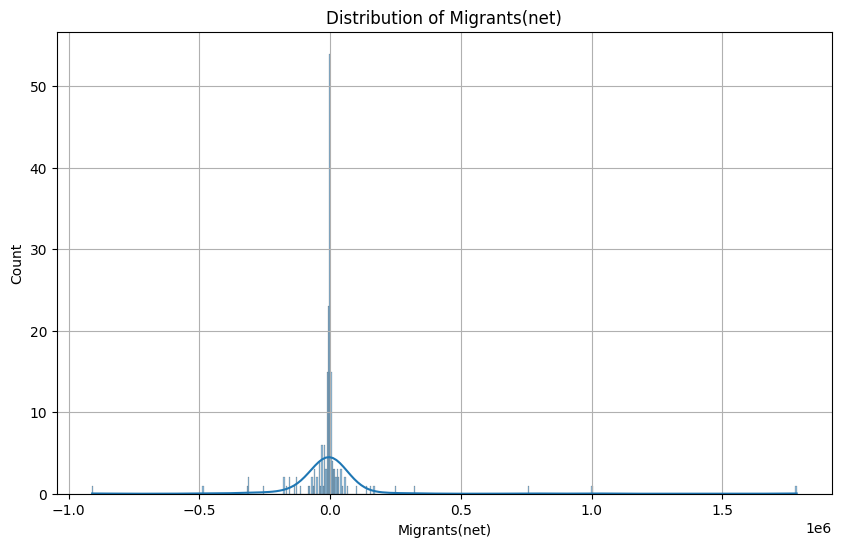

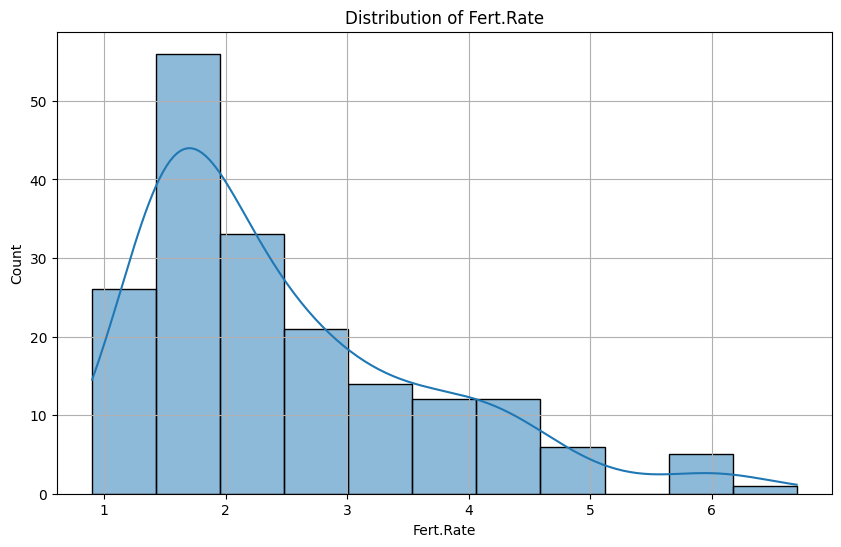

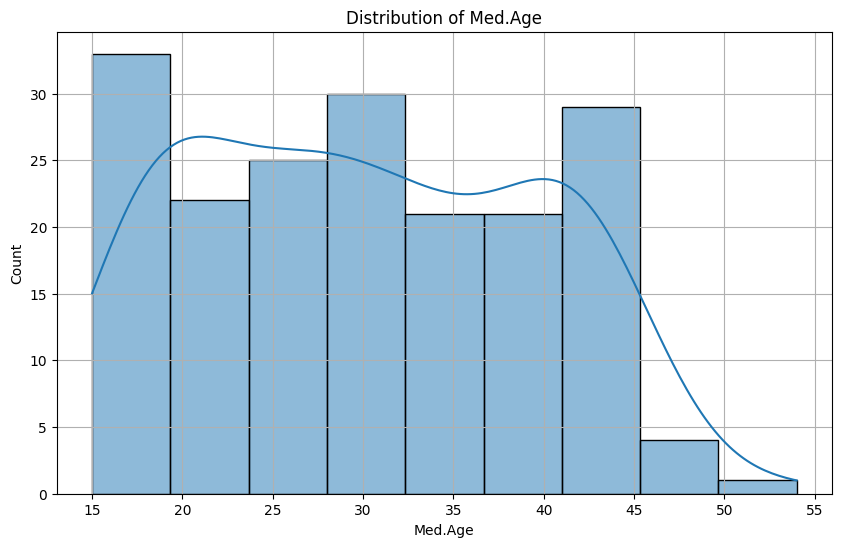

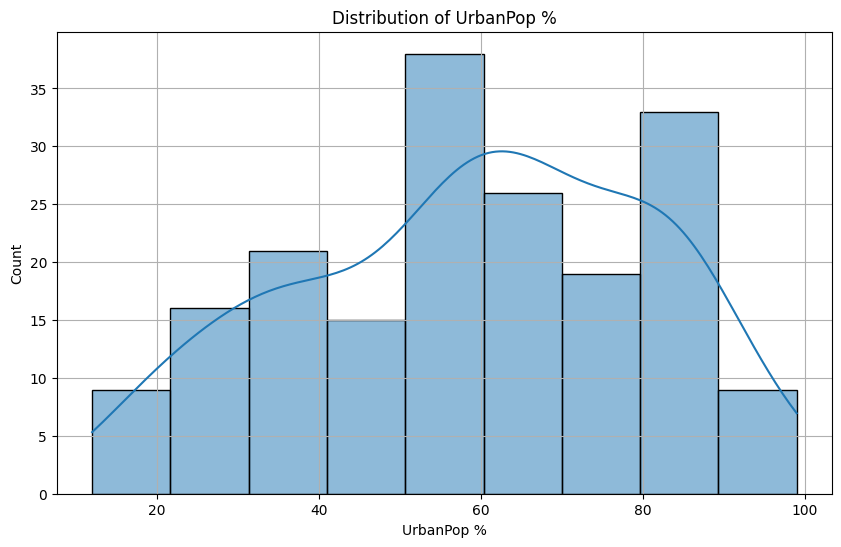

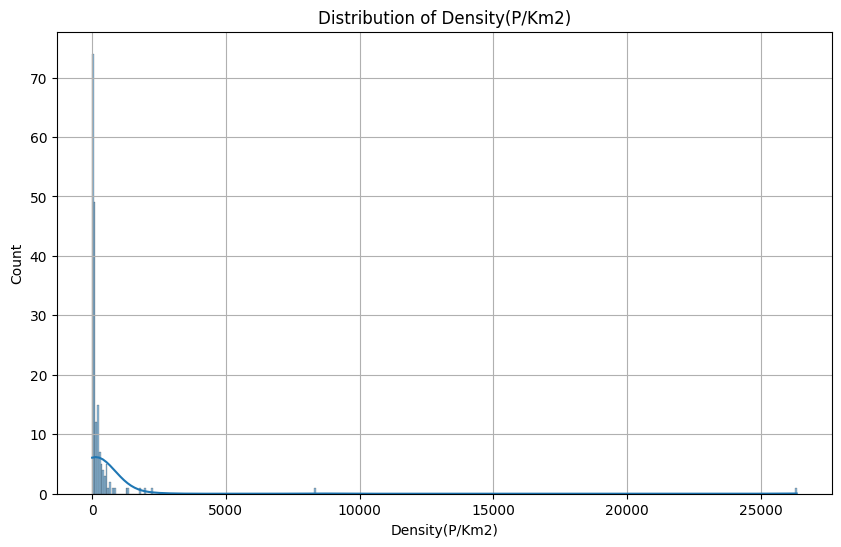

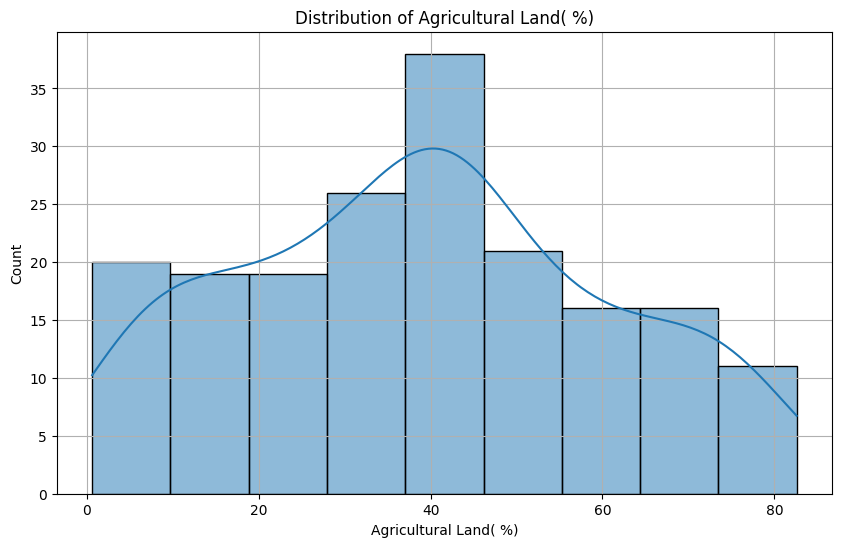

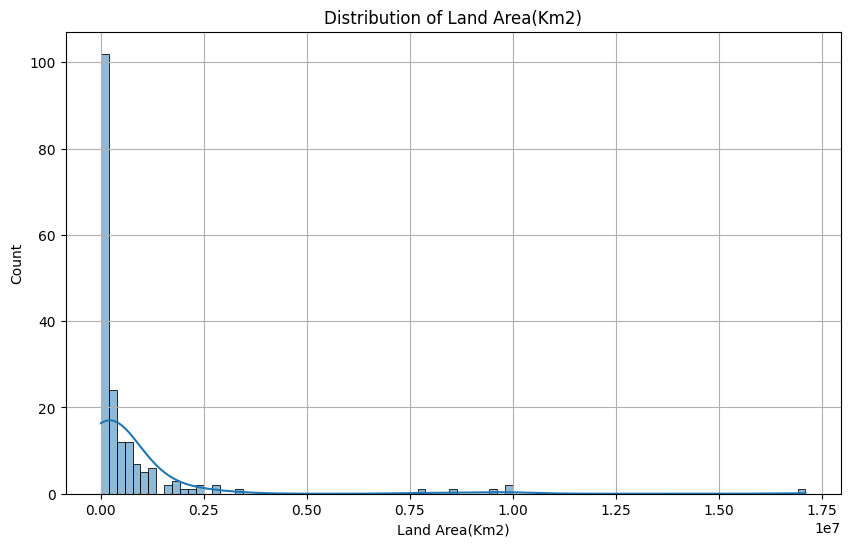

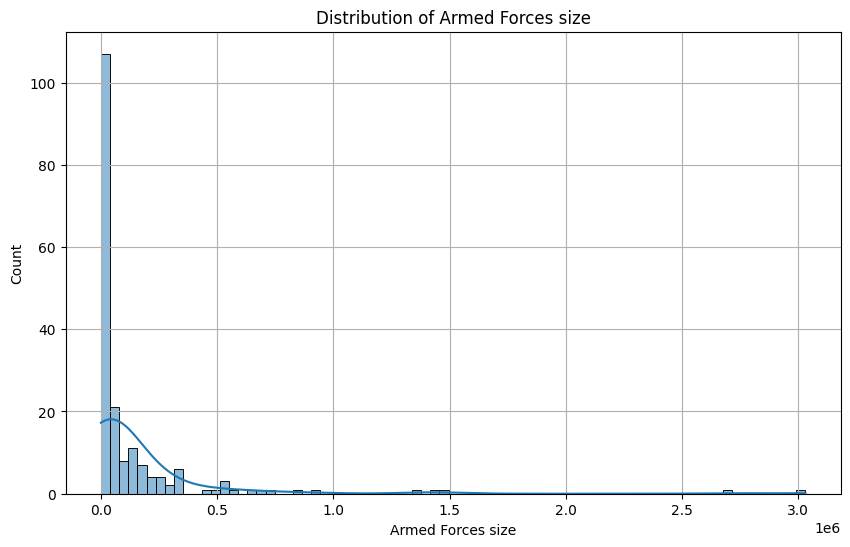

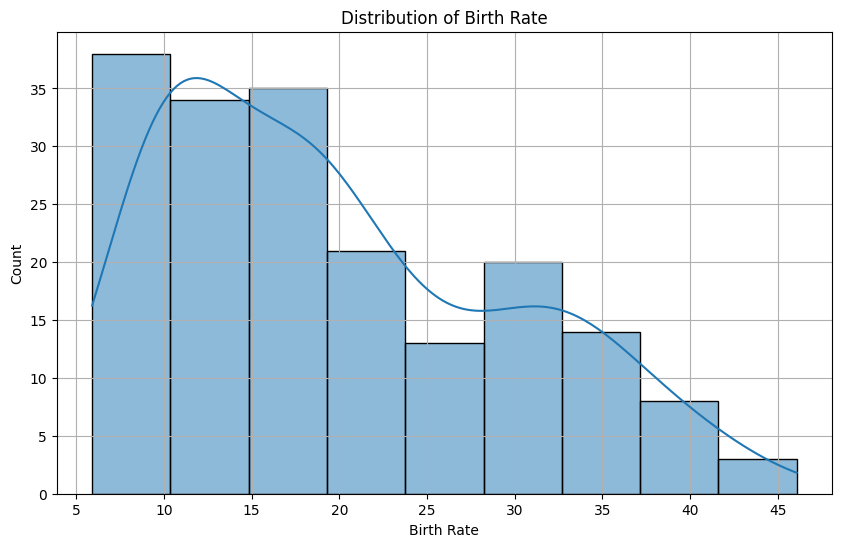

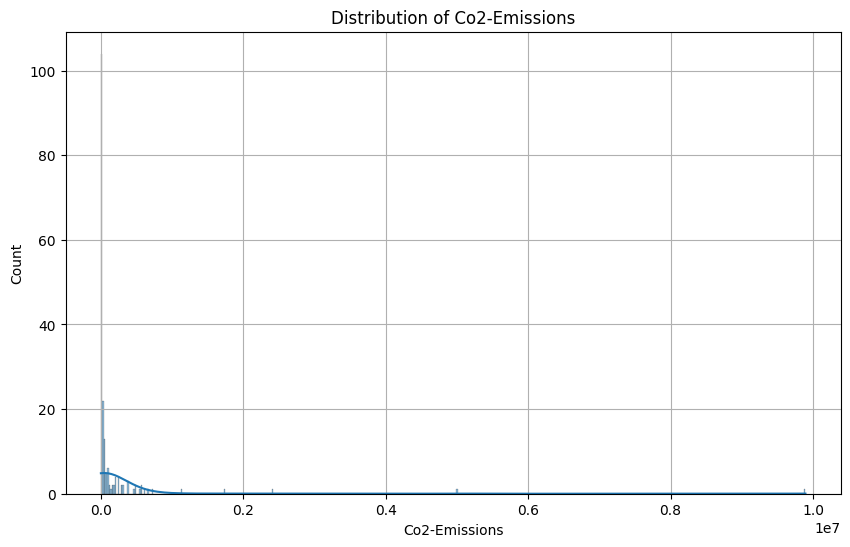

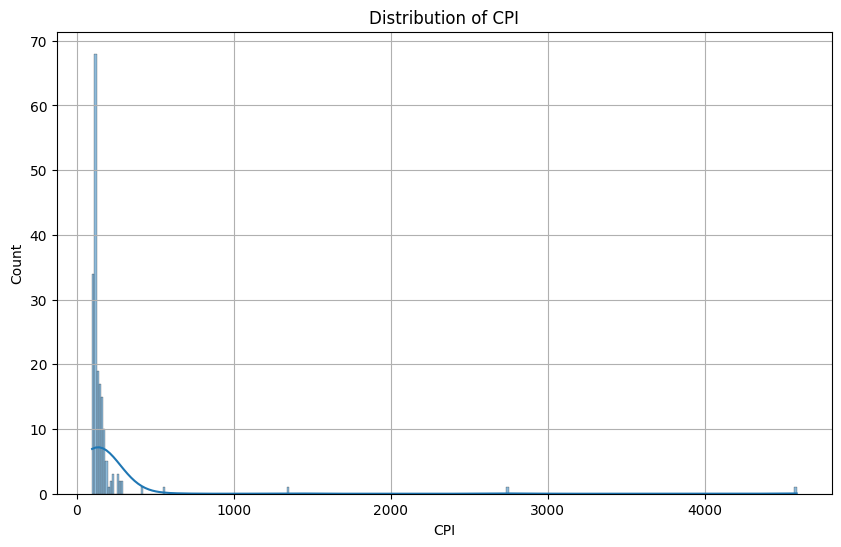

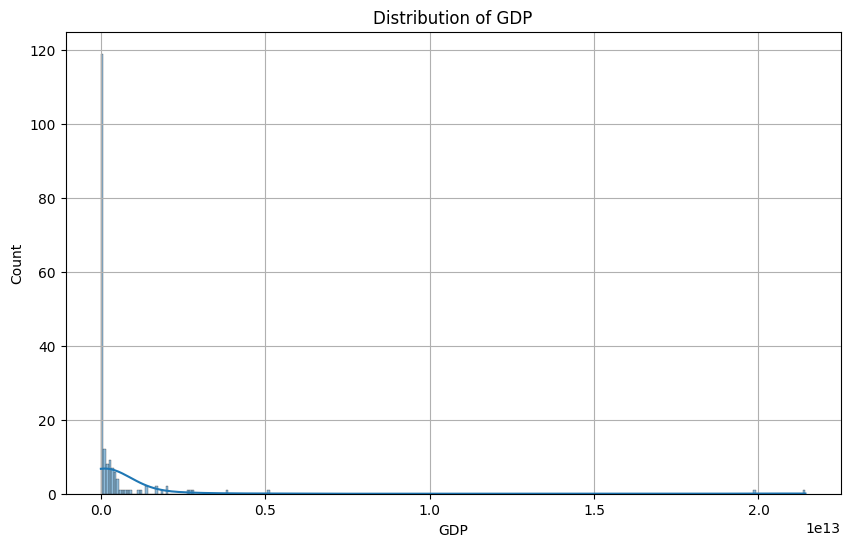

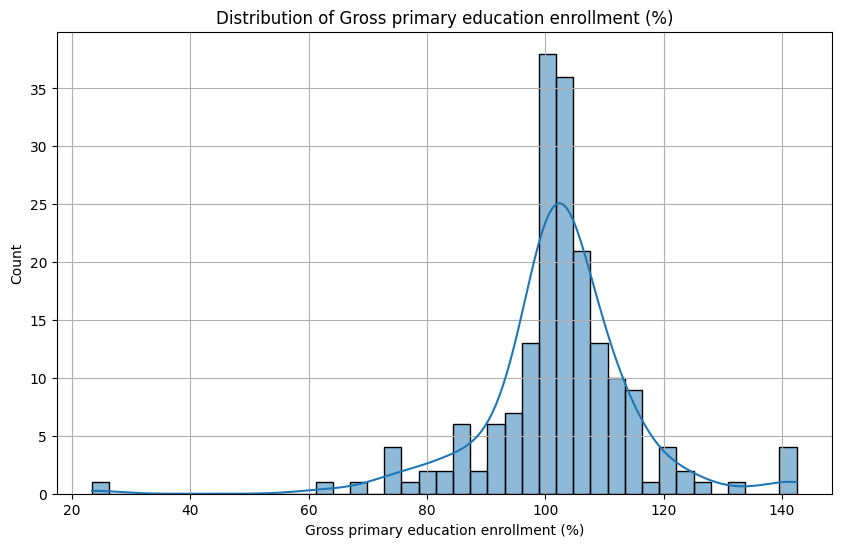

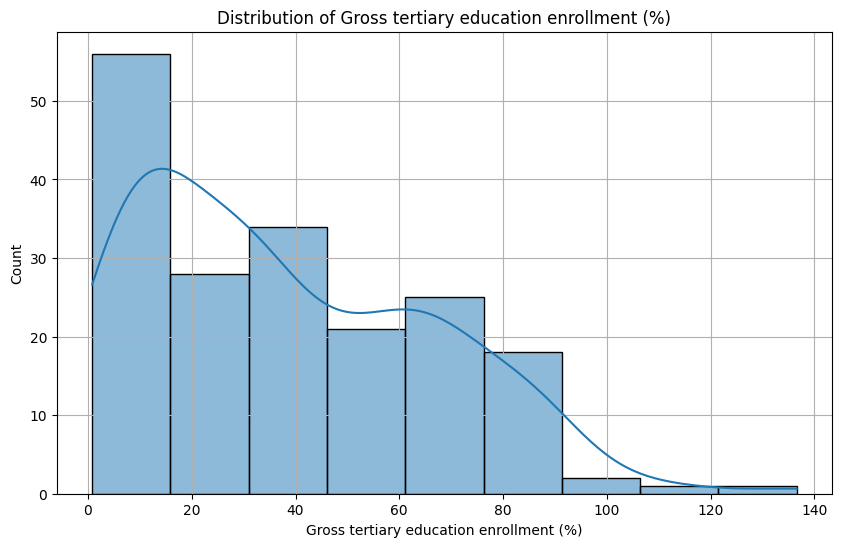

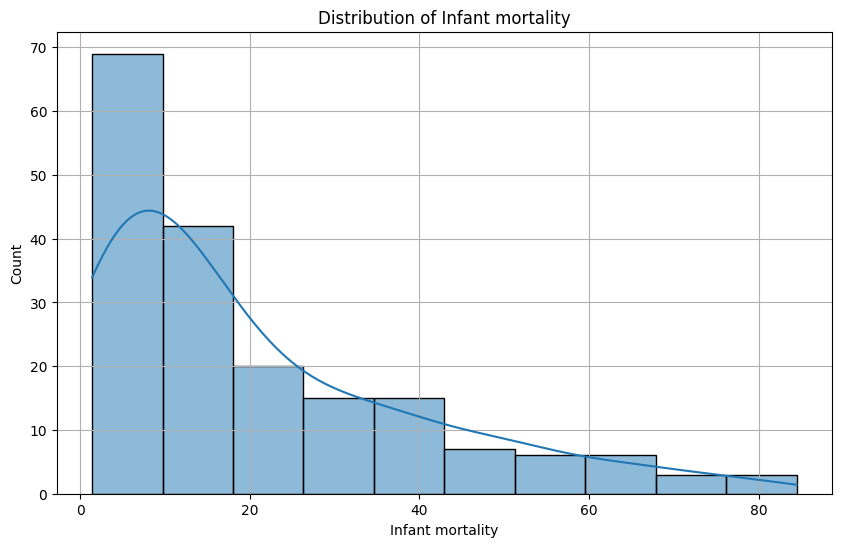

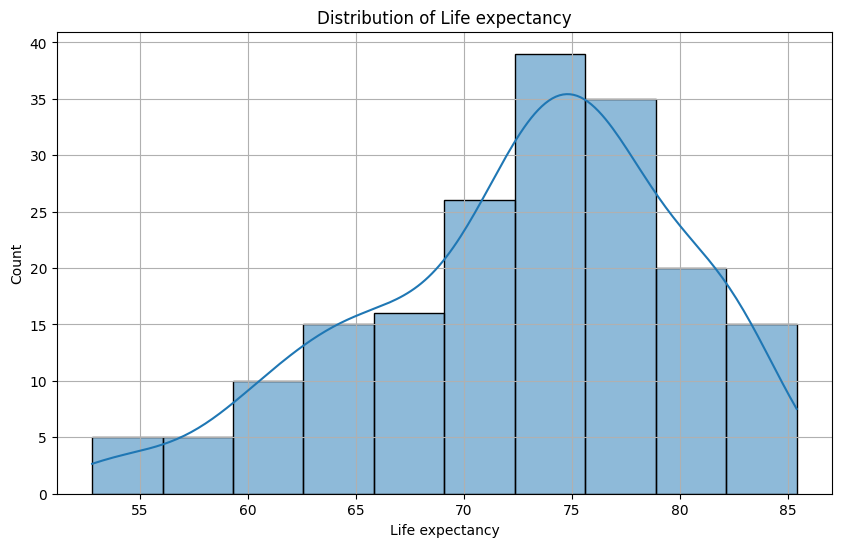

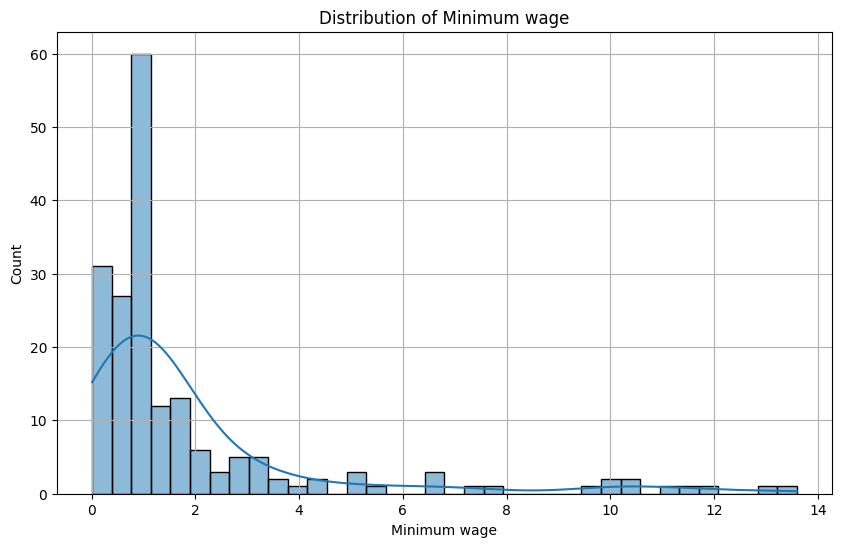

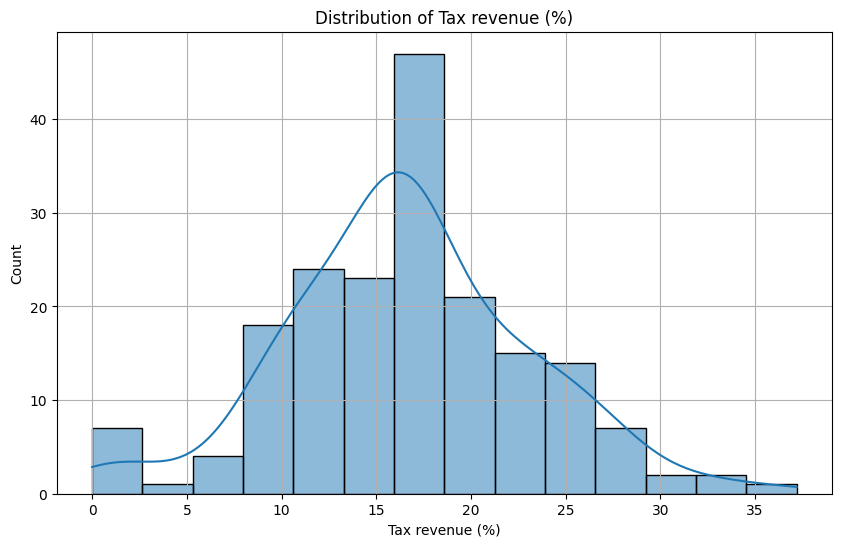

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Convert columns to numeric if necessary, excluding 'Country'
for column in df_merged.columns:
    if column != 'Country':  # Exclude 'Country' from conversion
        df_merged[column] = pd.to_numeric(df_merged[column], errors='coerce')

# Filter to keep only numeric columns
numeric_df = df_merged.select_dtypes(include=[np.number])

# skewness and kurtosis
skewness = numeric_df.skew()
kurtosis = numeric_df.kurt()

print("\nSkewness of the data:")
print(skewness)

print("\nKurtosis of the data:")
print(kurtosis)

# skewness and kurtosis to CSV files
skewness.to_csv('Skewness.csv')
kurtosis.to_csv('Kurtosis.csv')

# files to your local machine
files.download('Skewness.csv')
files.download('Kurtosis.csv')

# Visualizing the distributions of each numeric feature
for column in numeric_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.grid(True)
    plt.show()

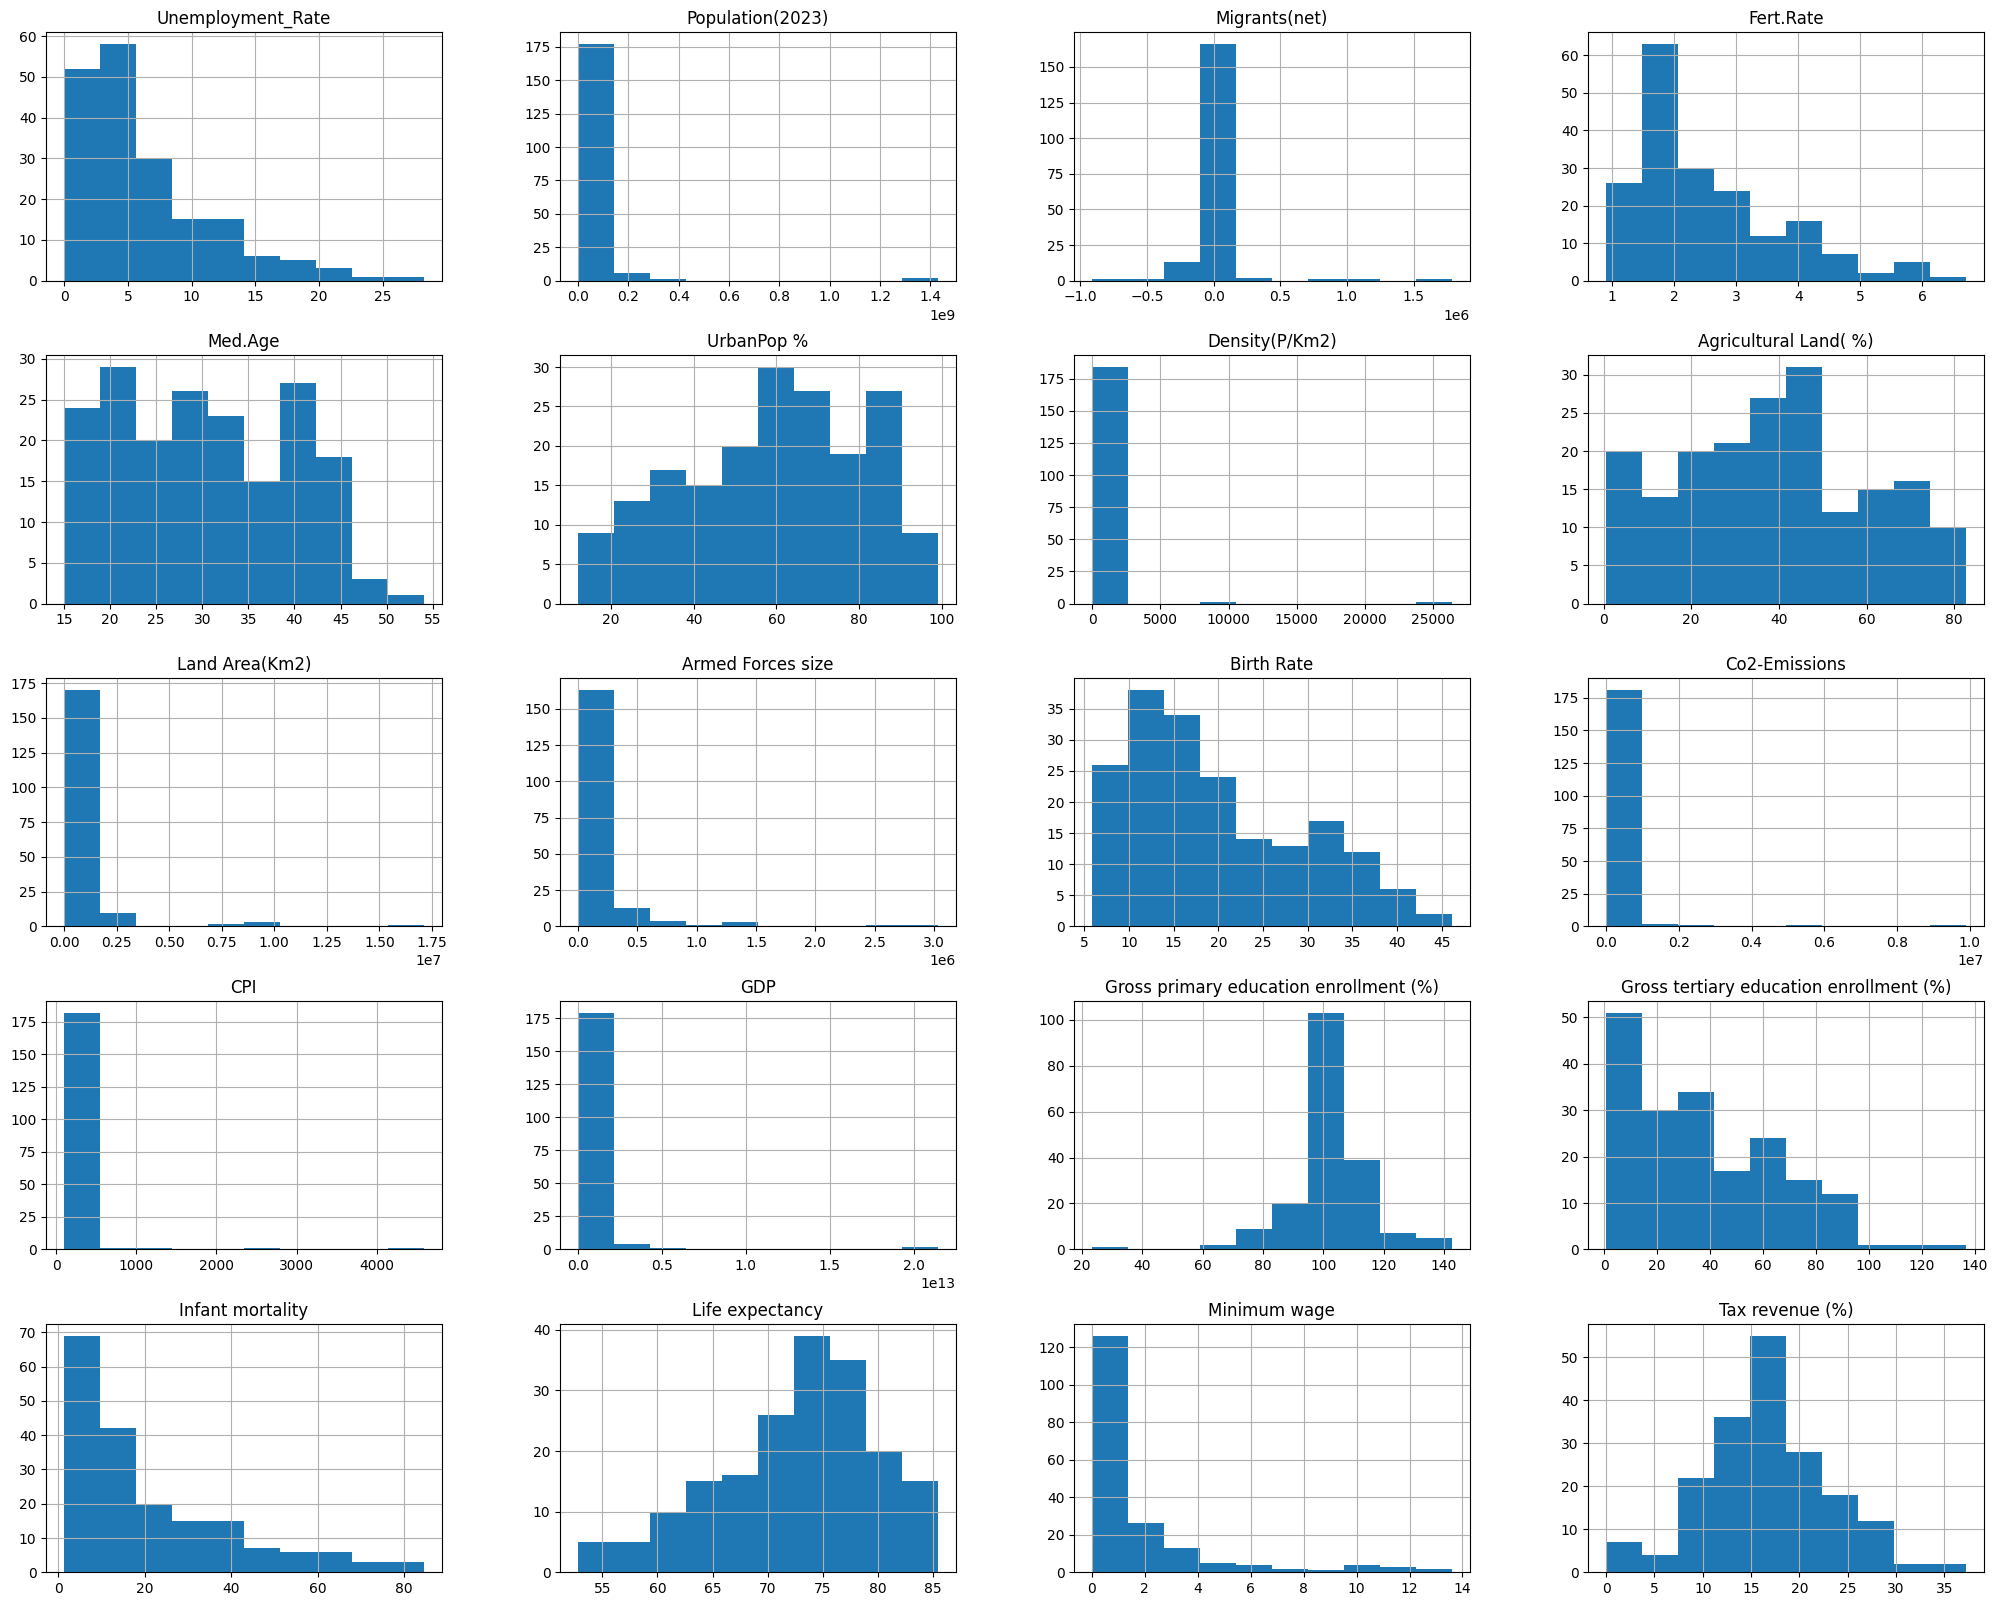

In [ ]:
# Histograms for all numerical columns
df_merged.hist(figsize=(25, 20))
plt.show()

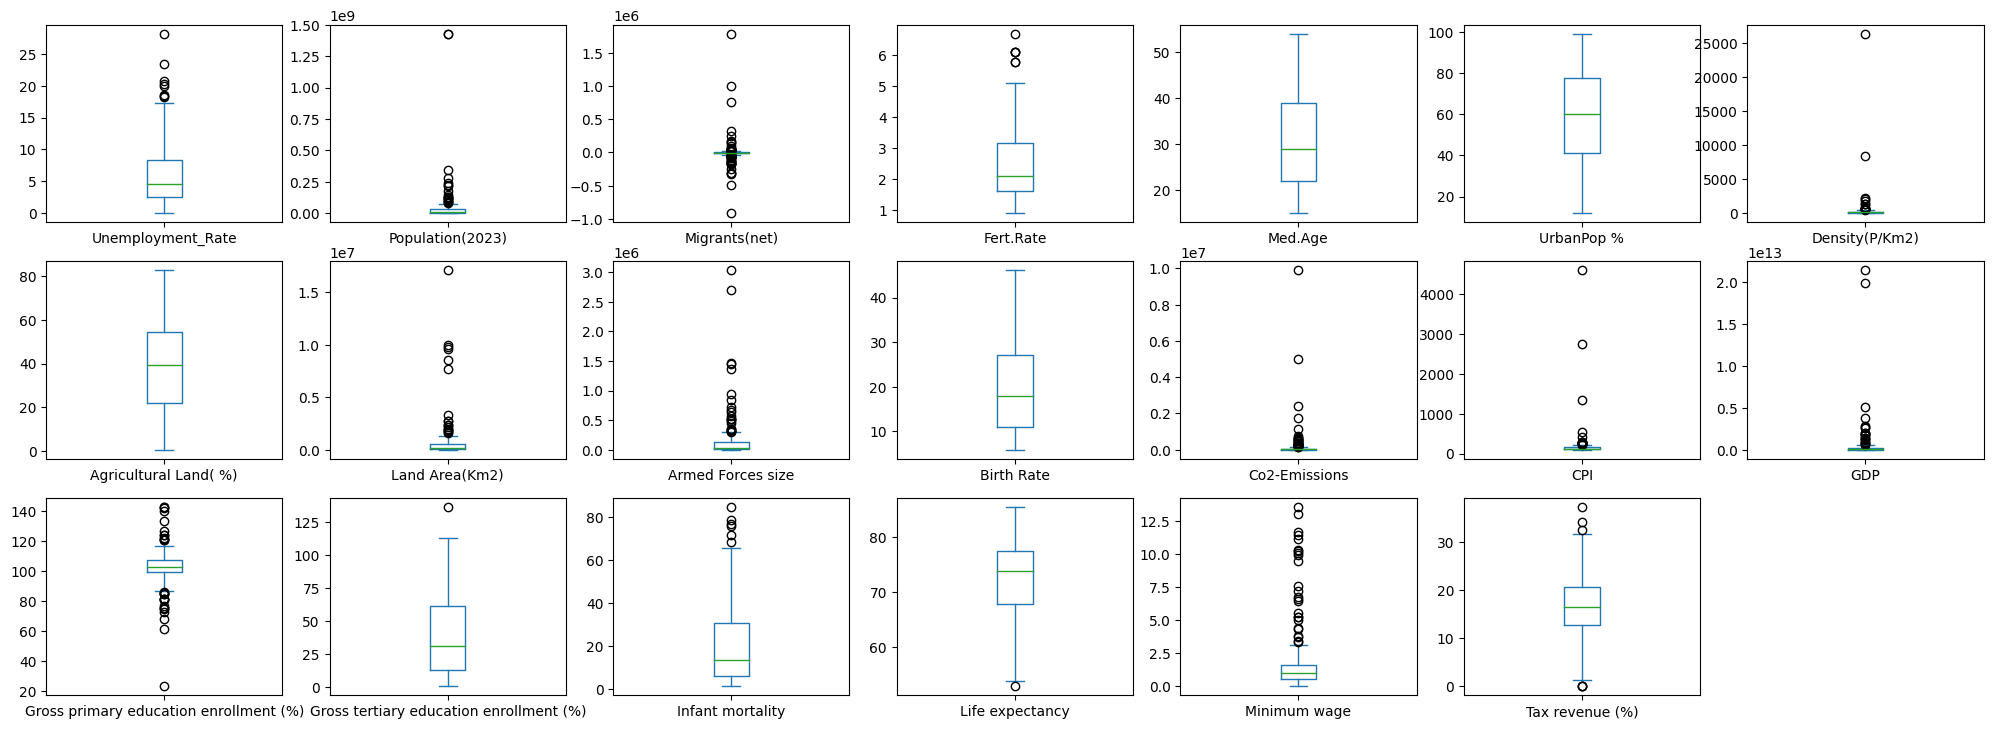

In [ ]:
# Box plots to identify outliers
df_merged.plot(kind='box', subplots=True, layout=(7,7), figsize=(25, 21))
plt.show()

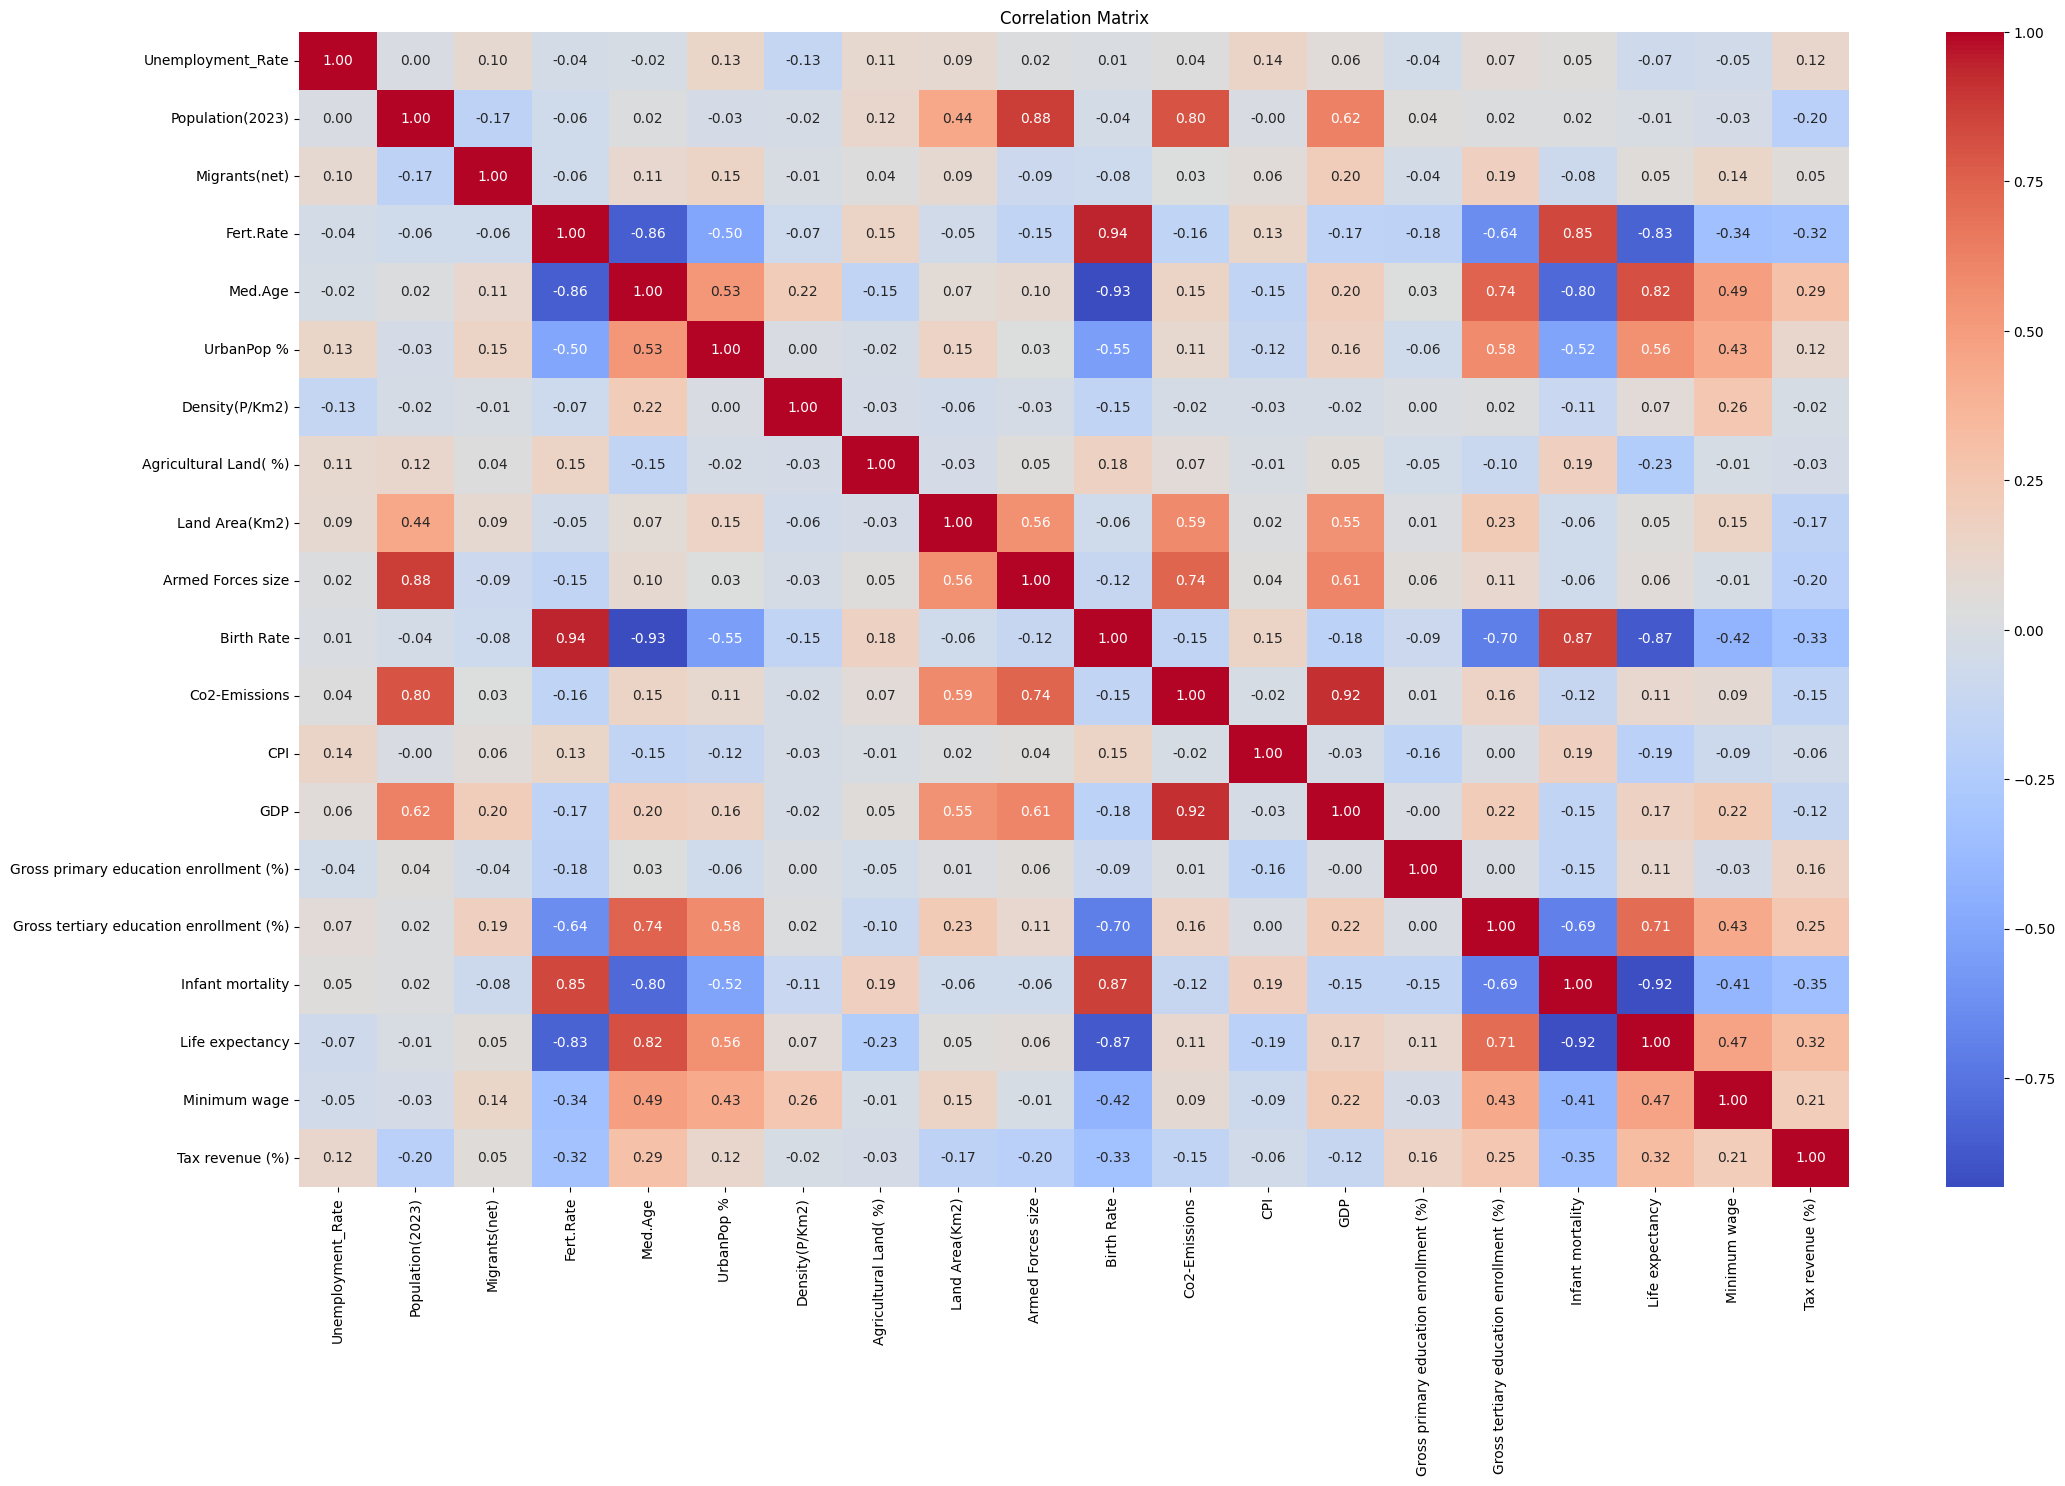

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 2. Correlation Matrix
# Ensure only numeric columns are included for correlation analysis
numeric_df = df_merged.select_dtypes(include=[np.number])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')

# Code to download the CSV file (specific to Google Colab)
from google.colab import files
files.download('correlation_matrix.csv')

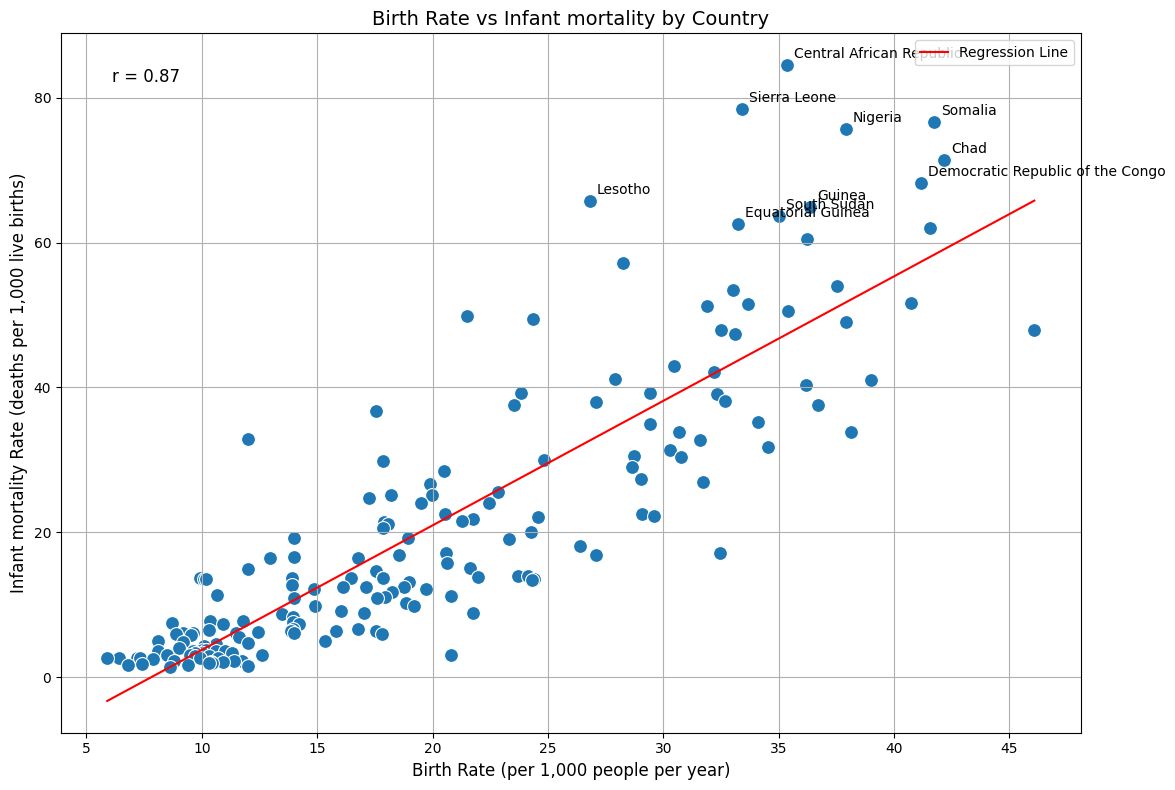

                                  Birth Rate  Infant mortality
Country                                                       
Central African Republic               35.35              84.5
Sierra Leone                           33.41              78.5
Somalia                                41.75              76.6
Nigeria                                37.91              75.7
Chad                                   42.17              71.4
Democratic Republic of the Congo       41.18              68.2
Lesotho                                26.81              65.7
Guinea                                 36.36              64.9
South Sudan                            35.01              63.7
Equatorial Guinea                      33.24              62.6


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the datasets
df_education = pd.read_csv('/content/drive/MyDrive/Pandas coursework/Global Population 2023 - Global Population-3.csv', encoding='iso-8859-1')
df_global_population = pd.read_csv('/content/drive/MyDrive/Pandas coursework/Global_Education.csv', encoding='iso-8859-1')
df_world_data = pd.read_csv('/content/drive/MyDrive/Pandas coursework/world-data-2023.csv', encoding='iso-8859-1')

# Group the data by 'Country' and calculate the mean of 'Birth Rate' and 'Infant Mortality'
grouped_data = df_merged.groupby('Country')[['Birth Rate', 'Infant mortality']].mean()

# Sort the data by Infant Mortality
grouped_data_sorted = grouped_data.sort_values(by='Infant mortality', ascending=False)

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Birth Rate', y='Infant mortality', data=grouped_data_sorted, s=100)

# Regression line and correlation coefficient
slope, intercept, r_value, p_value, std_err = stats.linregress(
    grouped_data_sorted['Birth Rate'], grouped_data_sorted['Infant mortality']
)

# Plot the regression line
x_vals = np.linspace(grouped_data_sorted['Birth Rate'].min(), grouped_data_sorted['Birth Rate'].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Display correlation coefficient on the plot
plt.text(0.05, 0.95, f'r = {r_value:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Update titles and labels with units
plt.title('Birth Rate vs Infant mortality by Country', fontsize=14)
plt.xlabel('Birth Rate (per 1,000 people per year)', fontsize=12)
plt.ylabel('Infant mortality Rate (deaths per 1,000 live births)', fontsize=12)
plt.grid(True)

# Label the top 10 countries on the plot
for i, row in grouped_data_sorted.head(10).iterrows():
    plt.annotate(row.name, (row['Birth Rate'], row['Infant mortality']), xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.legend()
plt.show()

# Display top 10 countries with the highest infant mortality
print(grouped_data_sorted.head(10))

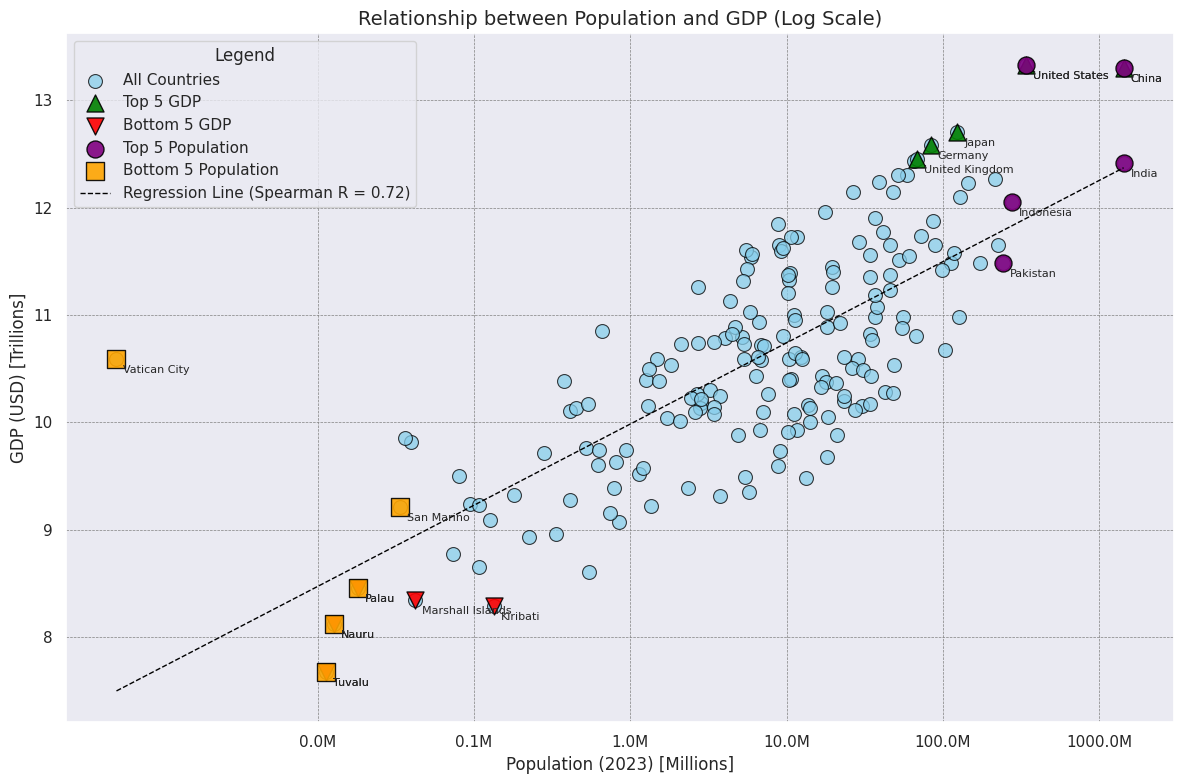

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Filter out missing values BEFORE transformation
df_filtered = df_merged.dropna(subset=['Population(2023)', 'GDP'])

# Convert Population and GDP to numeric values in case there are any non-numeric entries
df_filtered['Population(2023)'] = pd.to_numeric(df_filtered['Population(2023)'], errors='coerce')
df_filtered['GDP'] = pd.to_numeric(df_filtered['GDP'], errors='coerce')

# Drop rows with NaN values after conversion
df_filtered = df_filtered.dropna(subset=['Population(2023)', 'GDP'])

# Log transform both population and GDP
df_filtered['Log Population'] = np.log10(df_filtered['Population(2023)'])
df_filtered['Log GDP'] = np.log10(df_filtered['GDP'])

# Calculate Spearman correlations on log-transformed data
correlation_spearman = df_filtered['Log Population'].corr(df_filtered['Log GDP'], method='spearman')

# Sort data to get top and bottom 5 countries by GDP and population
top_5_gdp = df_filtered.nlargest(5, 'GDP')
bottom_5_gdp = df_filtered.nsmallest(5, 'GDP')
top_5_pop = df_filtered.nlargest(5, 'Population(2023)')
bottom_5_pop = df_filtered.nsmallest(5, 'Population(2023)')

# Calculate the regression line using log-transformed values
if len(df_filtered) > 1:  # Check if there's enough data
    slope, intercept, _, _, _ = stats.linregress(df_filtered['Log Population'], df_filtered['Log GDP'])
    x_vals = np.linspace(df_filtered['Log Population'].min(), df_filtered['Log Population'].max(), 100)
    y_vals = intercept + slope * x_vals
else:
    print("Not enough data points to calculate regression and plot.")

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.set_theme()

# Plot ALL countries FIRST
sns.scatterplot(x='Log Population', y='Log GDP', data=df_filtered,
                s=100, alpha=0.75, edgecolor='black', color='skyblue', label='All Countries', zorder=1)

# Create highlight groups for plotting and annotations
highlight_group=[
    (top_5_gdp, 'green', '^', 'Top 5 GDP'),
    (bottom_5_gdp, 'red', 'v', 'Bottom 5 GDP'),
    (top_5_pop, 'purple', 'o', 'Top 5 Population'),
    (bottom_5_pop, 'orange', 's', 'Bottom 5 Population')
]

# Highlight groups ON TOP
for df_group, color, marker, label in highlight_group:
    sns.scatterplot(x='Log Population', y='Log GDP', data=df_group,
                    s=150, alpha=0.9, edgecolor='black', color=color, marker=marker, label=label, zorder=2)
    for _, row in df_group.iterrows():
        plt.annotate(row['Country'], (row['Log Population'], row['Log GDP']),
                     textcoords="offset points", xytext=(5,-10), ha='left', fontsize=8)

# Add regression line
if len(df_filtered) > 1:
    plt.plot(x_vals, y_vals, color='black', linestyle='dashed', linewidth=1,
             label=f'Regression Line (Spearman R = {correlation_spearman:.2f})')

# Customize plot
plt.xlabel('Population (2023) [Millions]', fontsize=12)
plt.ylabel('GDP (USD) [Trillions]', fontsize=12)

# Adjust x-axis ticks to represent population in millions
x_ticks = [4, 5, 6, 7, 8, 9]
x_tick_labels = [f'{10**tick/1e6:.1f}M' for tick in x_ticks]
plt.xticks(x_ticks, x_tick_labels)

# Title
plt.title('Relationship between Population and GDP (Log Scale)', fontsize=14)

# Add legend
plt.legend(title='Legend')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()

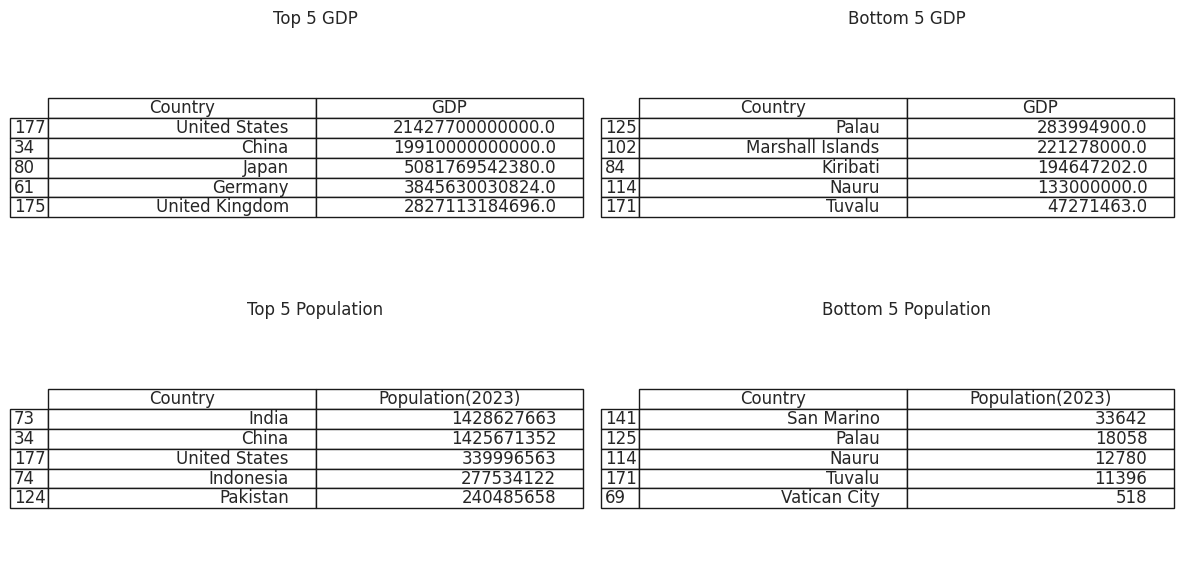

In [ ]:
# Sort by GDP and select top/bottom 5
df_filtered_sorted_gdp = df_filtered.sort_values(by='GDP', ascending=False)  # Sort by GDP in descending order
top_5_gdp = df_filtered_sorted_gdp[['Country', 'GDP']].head(5)  # Select top 5
bottom_5_gdp = df_filtered_sorted_gdp[['Country', 'GDP']].tail(5)  # Select bottom 5

# Sort by Population and select top/bottom 5
df_filtered_sorted_pop = df_filtered.sort_values(by='Population(2023)', ascending=False)  # Sort by population in descending order
top_5_pop = df_filtered_sorted_pop[['Country', 'Population(2023)']].head(5)  # Select top 5
bottom_5_pop = df_filtered_sorted_pop[['Country', 'Population(2023)']].tail(5)  # Select bottom 5

# Create table of Top/Bottom GDP and Population
fig, axs = plt.subplots(2, 2, figsize=(12, 6)) # Create a 2x2 grid for tables

# Create tables using the variables
pd.plotting.table(axs[0, 0], top_5_gdp, loc='center')
pd.plotting.table(axs[0, 1], bottom_5_gdp, loc='center')
pd.plotting.table(axs[1, 0], top_5_pop, loc='center')
pd.plotting.table(axs[1, 1], bottom_5_pop, loc='center')

# Add titles to the tables
axs[0, 0].set_title('Top 5 GDP')
axs[0, 1].set_title('Bottom 5 GDP')
axs[1, 0].set_title('Top 5 Population')
axs[1, 1].set_title('Bottom 5 Population')

# Hide table axes (only want the data)
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

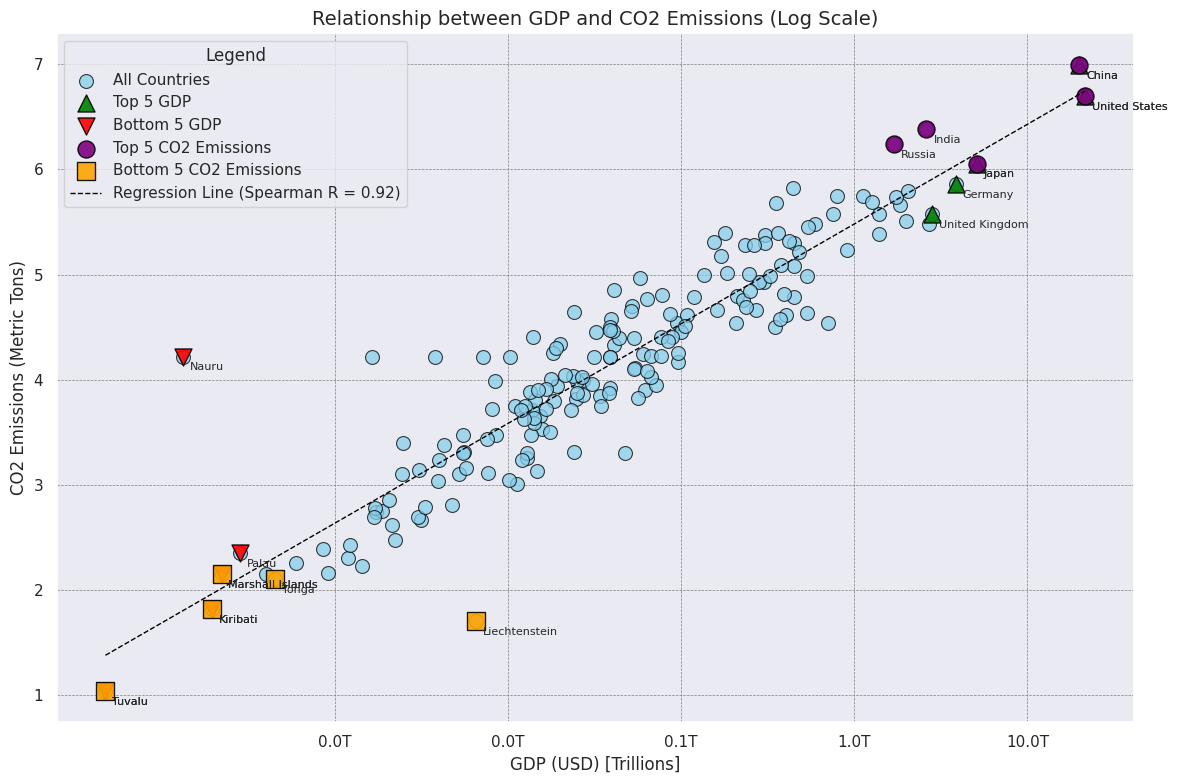

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Filter for necessary columns and remove missing values
df_filtered = df_merged.dropna(subset=['GDP', 'Co2-Emissions'])

# Convert to numeric values in case there are any non-numeric entries
df_filtered['GDP'] = pd.to_numeric(df_filtered['GDP'], errors='coerce')
df_filtered['Co2-Emissions'] = pd.to_numeric(df_filtered['Co2-Emissions'], errors='coerce')

# Drop any remaining rows with NaN after conversion
df_filtered = df_filtered.dropna(subset=['GDP', 'Co2-Emissions'])

# Log transform both GDP and CO2 emissions
df_filtered['Log GDP'] = np.log10(df_filtered['GDP'])
df_filtered['Log CO2 Emissions'] = np.log10(df_filtered['Co2-Emissions'])

# Calculate Spearman correlations on log-transformed data
correlation_spearman = df_filtered['Log GDP'].corr(df_filtered['Log CO2 Emissions'], method='spearman')

# Sort data to get top and bottom 5 countries by GDP and CO2 emissions
top_5_gdp = df_filtered.nlargest(5, 'GDP')
bottom_5_gdp = df_filtered.nsmallest(5, 'GDP')
top_5_co2 = df_filtered.nlargest(5, 'Co2-Emissions')
bottom_5_co2 = df_filtered.nsmallest(5, 'Co2-Emissions')

# Calculate the regression line using log-transformed values
if len(df_filtered) > 1:  # Check if there's enough data
    slope, intercept, _, _, _ = stats.linregress(df_filtered['Log GDP'], df_filtered['Log CO2 Emissions'])
    x_vals = np.linspace(df_filtered['Log GDP'].min(), df_filtered['Log GDP'].max(), 100)
    y_vals = intercept + slope * x_vals
else:
    print("Not enough data points to calculate regression and plot.")

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.set_theme()

# Plot ALL countries FIRST
sns.scatterplot(x='Log GDP', y='Log CO2 Emissions', data=df_filtered,
                s=100, alpha=0.75, edgecolor='black', color='skyblue', label='All Countries', zorder=1)

# Create highlight groups for plotting and annotations
highlight_group = [
    (top_5_gdp, 'green', '^', 'Top 5 GDP'),
    (bottom_5_gdp, 'red', 'v', 'Bottom 5 GDP'),
    (top_5_co2, 'purple', 'o', 'Top 5 CO2 Emissions'),
    (bottom_5_co2, 'orange', 's', 'Bottom 5 CO2 Emissions')
]

# Highlight groups ON TOP
for df_group, color, marker, label in highlight_group:
    sns.scatterplot(x='Log GDP', y='Log CO2 Emissions', data=df_group,
                    s=150, alpha=0.9, edgecolor='black', color=color, marker=marker, label=label, zorder=2)
    for _, row in df_group.iterrows():
        plt.annotate(row['Country'], (row['Log GDP'], row['Log CO2 Emissions']),
                     textcoords="offset points", xytext=(5, -10), ha='left', fontsize=8)

# Add regression line
if len(df_filtered) > 1:
    plt.plot(x_vals, y_vals, color='black', linestyle='dashed', linewidth=1,
             label=f'Regression Line (Spearman R = {correlation_spearman:.2f})')

# Customize plot
plt.xlabel('GDP (USD) [Trillions]', fontsize=12)
plt.ylabel('CO2 Emissions (Metric Tons)', fontsize=12)

# Adjust x-axis ticks to represent GDP in trillions
x_ticks = [9, 10, 11, 12, 13]
x_tick_labels = [f'{10**tick/1e12:.1f}T' for tick in x_ticks]
plt.xticks(x_ticks, x_tick_labels)

# Title
plt.title('Relationship between GDP and CO2 Emissions (Log Scale)', fontsize=14)

# Add legend
plt.legend(title='Legend')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()

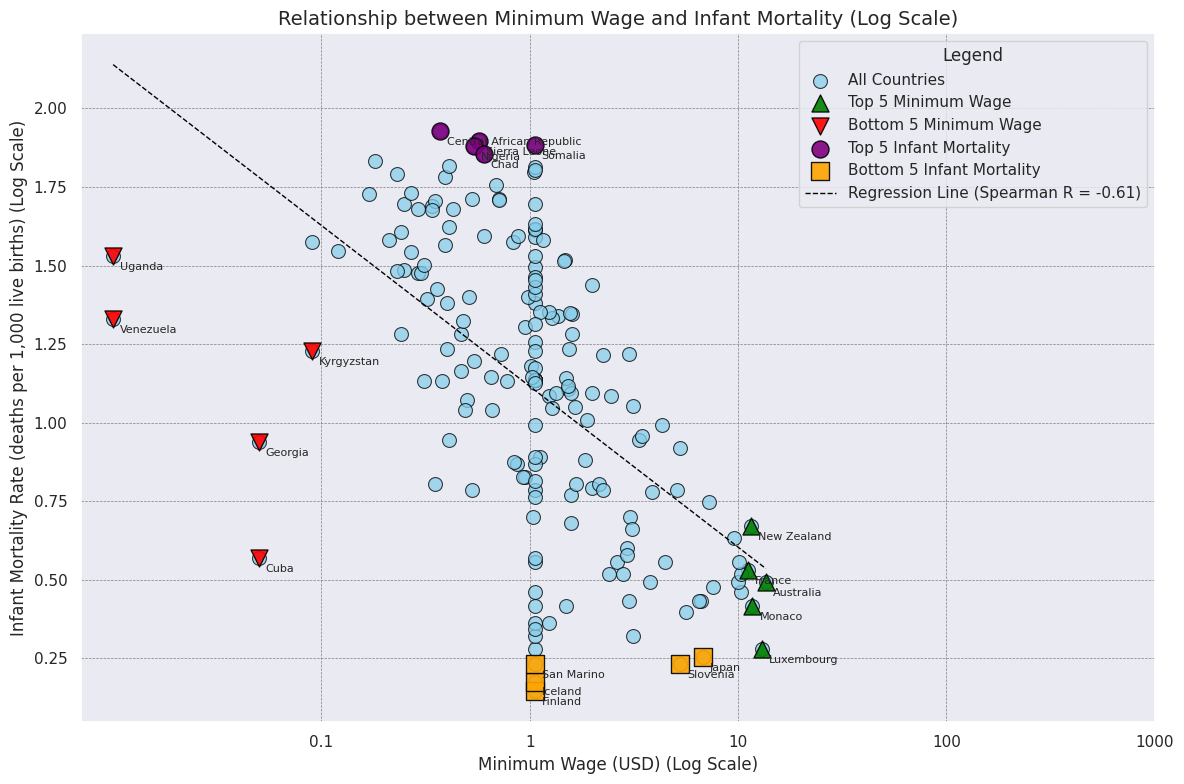

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Filter for necessary columns and remove missing values
df_filtered = df_merged.dropna(subset=['Minimum wage', 'Infant mortality'])

# Convert to numeric values in case there are any non-numeric entries
df_filtered['Minimum wage'] = pd.to_numeric(df_filtered['Minimum wage'], errors='coerce')
df_filtered['Infant mortality'] = pd.to_numeric(df_filtered['Infant mortality'], errors='coerce')

# Drop rows where minimum wage or infant mortality are less than or equal to zero
df_filtered = df_filtered[(df_filtered['Minimum wage'] > 0) & (df_filtered['Infant mortality'] > 0)]

# Drop any remaining rows with NaN after conversion
df_filtered = df_filtered.dropna(subset=['Minimum wage', 'Infant mortality'])

# Log transform both minimum wage and infant mortality
df_filtered['Log Minimum Wage'] = np.log10(df_filtered['Minimum wage'])
df_filtered['Log Infant Mortality'] = np.log10(df_filtered['Infant mortality'])

# Calculate Spearman correlations on log-transformed data
correlation_spearman = df_filtered['Log Minimum Wage'].corr(df_filtered['Log Infant Mortality'], method='spearman')

# Sort data to get top and bottom 5 countries by minimum wage and infant mortality
top_5_minimum_wage = df_filtered.nlargest(5, 'Minimum wage')
bottom_5_minimum_wage = df_filtered.nsmallest(5, 'Minimum wage')
top_5_infant_mortality = df_filtered.nlargest(5, 'Infant mortality')
bottom_5_infant_mortality = df_filtered.nsmallest(5, 'Infant mortality')

# Calculate the regression line using log-transformed values
if len(df_filtered) > 1:  # Check if there's enough data
    slope, intercept, _, _, _ = stats.linregress(df_filtered['Log Minimum Wage'], df_filtered['Log Infant Mortality'])
    x_vals = np.linspace(df_filtered['Log Minimum Wage'].min(), df_filtered['Log Minimum Wage'].max(), 100)
    y_vals = intercept + slope * x_vals
else:
    print("Not enough data points to calculate regression and plot.")

# scatter plot
plt.figure(figsize=(12, 8))
sns.set_theme()

# Plot ALL countries FIRST
sns.scatterplot(x='Log Minimum Wage', y='Log Infant Mortality', data=df_filtered,
                s=100, alpha=0.75, edgecolor='black', color='skyblue', label='All Countries', zorder=1)

# Create highlight groups for plotting and annotations
highlight_group = [
    (top_5_minimum_wage, 'green', '^', 'Top 5 Minimum Wage'),
    (bottom_5_minimum_wage, 'red', 'v', 'Bottom 5 Minimum Wage'),
    (top_5_infant_mortality, 'purple', 'o', 'Top 5 Infant Mortality'),
    (bottom_5_infant_mortality, 'orange', 's', 'Bottom 5 Infant Mortality')
]

# Highlight groups ON TOP
for df_group, color, marker, label in highlight_group:
    sns.scatterplot(x='Log Minimum Wage', y='Log Infant Mortality', data=df_group,
                    s=150, alpha=0.9, edgecolor='black', color=color, marker=marker, label=label, zorder=2)
    for _, row in df_group.iterrows():
        plt.annotate(row['Country'], (row['Log Minimum Wage'], row['Log Infant Mortality']),
                     textcoords="offset points", xytext=(5, -10), ha='left', fontsize=8)

#  regression line
if len(df_filtered) > 1:
    plt.plot(x_vals, y_vals, color='black', linestyle='dashed', linewidth=1,
             label=f'Regression Line (Spearman R = {correlation_spearman:.2f})')

# Customize plot
plt.xlabel('Minimum Wage (USD) (Log Scale)', fontsize=12)
plt.ylabel('Infant Mortality Rate (deaths per 1,000 live births) (Log Scale)', fontsize=12)

# Adjust x-axis ticks to represent log-transformed values
x_ticks = np.log10([0.1, 1, 10, 100, 1000])
x_tick_labels = ['0.1', '1', '10', '100', '1000']
plt.xticks(x_ticks, x_tick_labels)

# Title
plt.title('Relationship between Minimum Wage and Infant Mortality (Log Scale)', fontsize=14)

# legend
plt.legend(title='Legend')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()

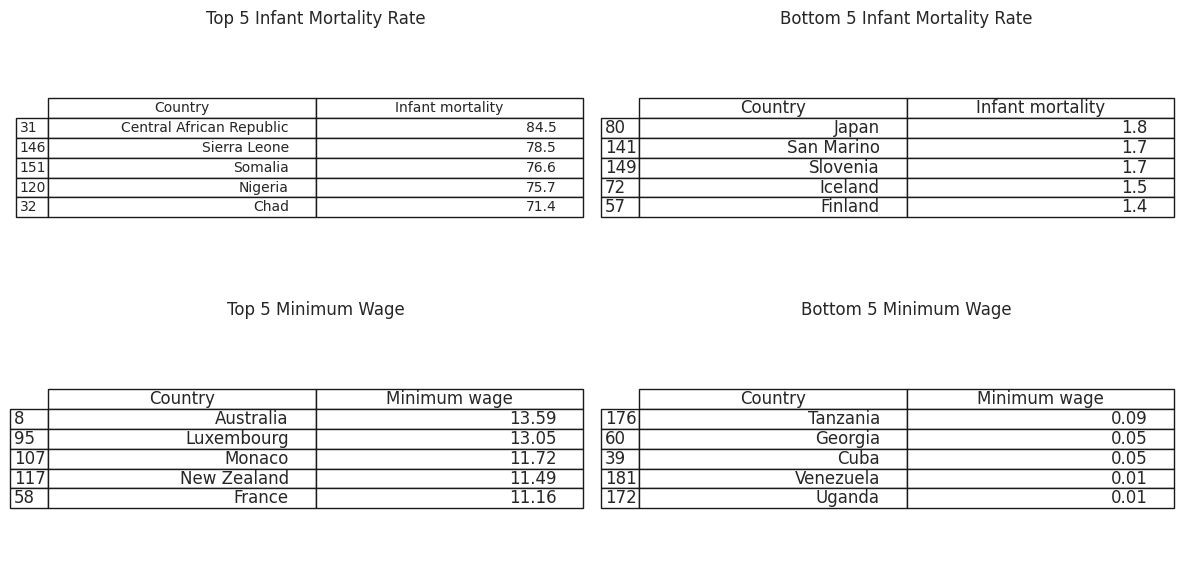

In [ ]:
# Sort by GDP and select top/bottom 5
df_filtered_sorted_gdp = df_filtered.sort_values(by='Infant mortality', ascending=False)  # Sort by GDP in descending order
top_5_gdp = df_filtered_sorted_gdp[['Country', 'Infant mortality']].head(5)  # Select top 5
bottom_5_gdp = df_filtered_sorted_gdp[['Country', 'Infant mortality']].tail(5)  # Select bottom 5

# Sort by Population and select top/bottom 5
df_filtered_sorted_pop = df_filtered.sort_values(by='Minimum wage', ascending=False)  # Sort by population in descending order
top_5_pop = df_filtered_sorted_pop[['Country', 'Minimum wage']].head(5)  # Select top 5
bottom_5_pop = df_filtered_sorted_pop[['Country', 'Minimum wage']].tail(5)  # Select bottom 5

# table of Top/Bottom GDP and Population
fig, axs = plt.subplots(2, 2, figsize=(12, 6)) # Create a 2x2 grid for tables

# tables using the variables
pd.plotting.table(axs[0, 0], top_5_gdp, loc='center')
pd.plotting.table(axs[0, 1], bottom_5_gdp, loc='center')
pd.plotting.table(axs[1, 0], top_5_pop, loc='center')
pd.plotting.table(axs[1, 1], bottom_5_pop, loc='center')

# titles to the tables
axs[0, 0].set_title('Top 5 Infant Mortality Rate')
axs[0, 1].set_title('Bottom 5 Infant Mortality Rate')
axs[1, 0].set_title('Top 5 Minimum Wage')
axs[1, 1].set_title('Bottom 5 Minimum Wage')

# Hide table axes (only want the data)
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()

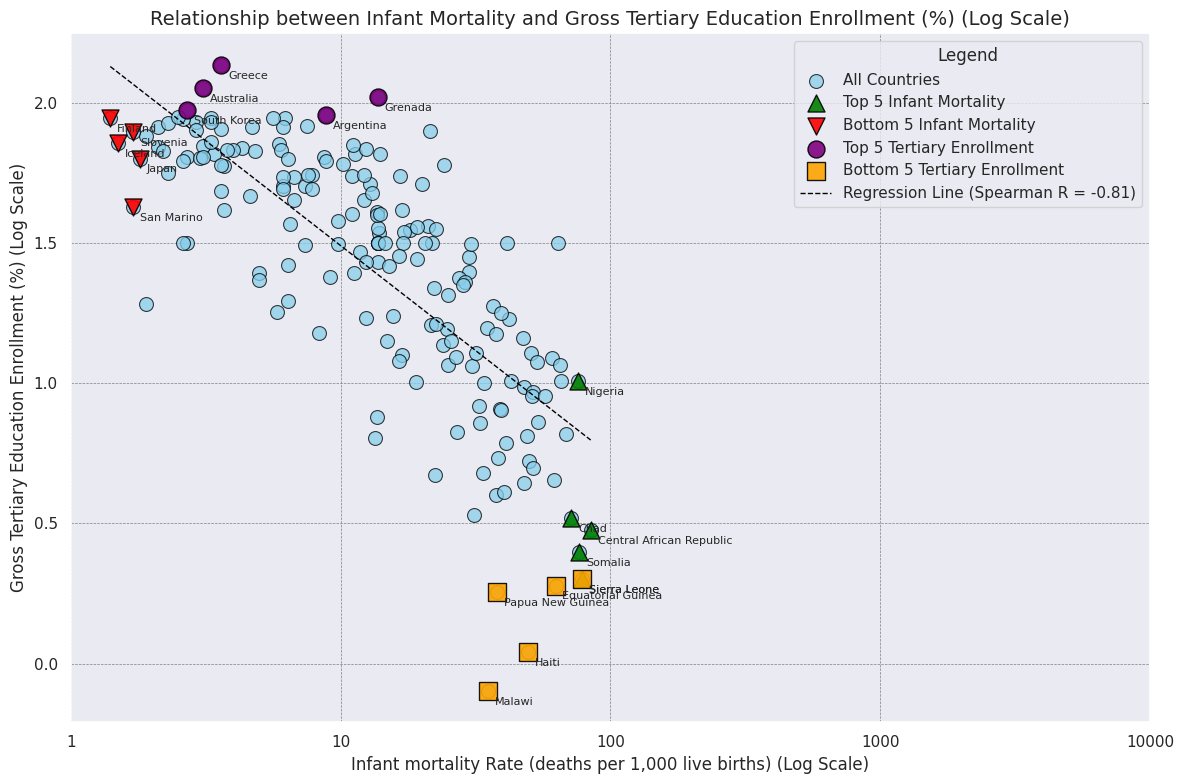

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Filter for necessary columns and remove missing values
df_filtered = df_merged.dropna(subset=['Infant mortality', 'Gross tertiary education enrollment (%)'])

# Convert to numeric values in case there are any non-numeric entries
df_filtered['Infant mortality'] = pd.to_numeric(df_filtered['Infant mortality'], errors='coerce')
df_filtered['Gross tertiary education enrollment (%)'] = pd.to_numeric(df_filtered['Gross tertiary education enrollment (%)'], errors='coerce')

# Drop any remaining rows with NaN after conversion
df_filtered = df_filtered.dropna(subset=['Infant mortality', 'Gross tertiary education enrollment (%)'])

# Log transform both infant mortality and gross tertiary education enrollment
df_filtered['Log Infant Mortality'] = np.log10(df_filtered['Infant mortality'])
df_filtered['Log Tertiary Enrollment'] = np.log10(df_filtered['Gross tertiary education enrollment (%)'])

# Calculate Spearman correlations on log-transformed data
correlation_spearman = df_filtered['Log Infant Mortality'].corr(df_filtered['Log Tertiary Enrollment'], method='spearman')

# Sort data to get top and bottom 5 countries by infant mortality and gross tertiary education enrollment
top_5_infant_mortality = df_filtered.nlargest(5, 'Infant mortality')
bottom_5_infant_mortality = df_filtered.nsmallest(5, 'Infant mortality')
top_5_tertiary_enrollment = df_filtered.nlargest(5, 'Gross tertiary education enrollment (%)')
bottom_5_tertiary_enrollment = df_filtered.nsmallest(5, 'Gross tertiary education enrollment (%)')

# Calculate the regression line using log-transformed values
if len(df_filtered) > 1:  # Check if there's enough data
    slope, intercept, _, _, _ = stats.linregress(df_filtered['Log Infant Mortality'], df_filtered['Log Tertiary Enrollment'])
    x_vals = np.linspace(df_filtered['Log Infant Mortality'].min(), df_filtered['Log Infant Mortality'].max(), 100)
    y_vals = intercept + slope * x_vals
else:
    print("Not enough data points to calculate regression and plot.")

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.set_theme()

# Plot ALL countries FIRST
sns.scatterplot(x='Log Infant Mortality', y='Log Tertiary Enrollment', data=df_filtered,
                s=100, alpha=0.75, edgecolor='black', color='skyblue', label='All Countries', zorder=1)

# highlight groups for plotting and annotations
highlight_group = [
    (top_5_infant_mortality, 'green', '^', 'Top 5 Infant Mortality'),
    (bottom_5_infant_mortality, 'red', 'v', 'Bottom 5 Infant Mortality'),
    (top_5_tertiary_enrollment, 'purple', 'o', 'Top 5 Tertiary Enrollment'),
    (bottom_5_tertiary_enrollment, 'orange', 's', 'Bottom 5 Tertiary Enrollment')
]

# Highlight groups ON TOP
for df_group, color, marker, label in highlight_group:
    sns.scatterplot(x='Log Infant Mortality', y='Log Tertiary Enrollment', data=df_group,
                    s=150, alpha=0.9, edgecolor='black', color=color, marker=marker, label=label, zorder=2)
    for _, row in df_group.iterrows():
        plt.annotate(row['Country'], (row['Log Infant Mortality'], row['Log Tertiary Enrollment']),
                     textcoords="offset points", xytext=(5, -10), ha='left', fontsize=8)

# regression line
if len(df_filtered) > 1:
    plt.plot(x_vals, y_vals, color='black', linestyle='dashed', linewidth=1,
             label=f'Regression Line (Spearman R = {correlation_spearman:.2f})')

# Customize plot
plt.xlabel('Infant mortality Rate (deaths per 1,000 live births) (Log Scale)', fontsize=12)
plt.ylabel('Gross Tertiary Education Enrollment (%) (Log Scale)', fontsize=12)

# Adjust x-axis ticks to represent log-transformed values
x_ticks = np.log10([1, 10, 100, 1000, 10000])
x_tick_labels = ['1', '10', '100', '1000', '10000']
plt.xticks(x_ticks, x_tick_labels)

# Title
plt.title('Relationship between Infant Mortality and Gross Tertiary Education Enrollment (%) (Log Scale)', fontsize=14)

# legend
plt.legend(title='Legend')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()

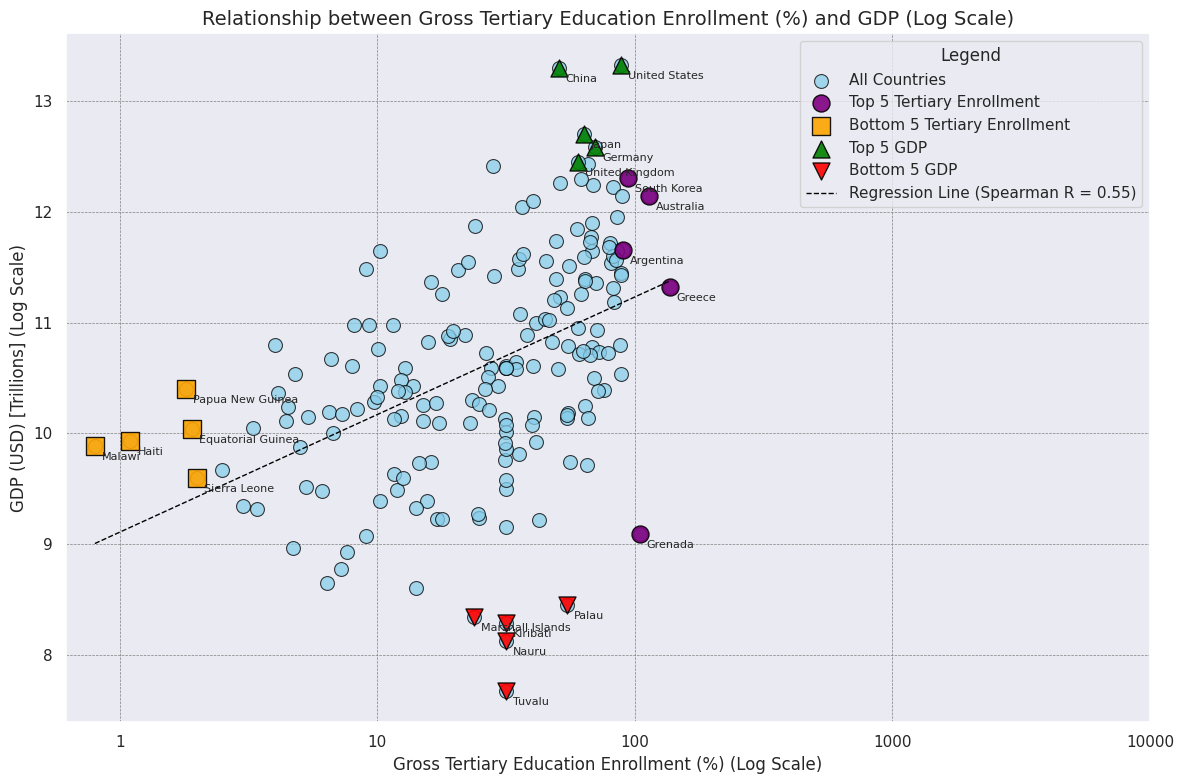

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Filter for necessary columns and remove missing values
df_filtered = df_merged.dropna(subset=['Gross tertiary education enrollment (%)', 'GDP'])

# Convert to numeric values in case there are any non-numeric entries
df_filtered['Gross tertiary education enrollment (%)'] = pd.to_numeric(df_filtered['Gross tertiary education enrollment (%)'], errors='coerce')
df_filtered['GDP'] = pd.to_numeric(df_filtered['GDP'], errors='coerce')

# Drop any remaining rows with NaN after conversion
df_filtered = df_filtered.dropna(subset=['Gross tertiary education enrollment (%)', 'GDP'])

# Log transform both gross tertiary education enrollment and GDP
df_filtered['Log Tertiary Enrollment'] = np.log10(df_filtered['Gross tertiary education enrollment (%)'])
df_filtered['Log GDP'] = np.log10(df_filtered['GDP'])

# Calculate Spearman correlations on log-transformed data
correlation_spearman = df_filtered['Log Tertiary Enrollment'].corr(df_filtered['Log GDP'], method='spearman')

# Sort data to get top and bottom 5 countries by gross tertiary education enrollment and GDP
top_5_tertiary_enrollment = df_filtered.nlargest(5, 'Gross tertiary education enrollment (%)')
bottom_5_tertiary_enrollment = df_filtered.nsmallest(5, 'Gross tertiary education enrollment (%)')
top_5_gdp = df_filtered.nlargest(5, 'GDP')
bottom_5_gdp = df_filtered.nsmallest(5, 'GDP')

# Calculate the regression line using log-transformed values
if len(df_filtered) > 1:  # Check if there's enough data
    slope, intercept, _, _, _ = stats.linregress(df_filtered['Log Tertiary Enrollment'], df_filtered['Log GDP'])
    x_vals = np.linspace(df_filtered['Log Tertiary Enrollment'].min(), df_filtered['Log Tertiary Enrollment'].max(), 100)
    y_vals = intercept + slope * x_vals
else:
    print("Not enough data points to calculate regression and plot.")

# scatter plot
plt.figure(figsize=(12, 8))
sns.set_theme()

# ALL countries FIRST
sns.scatterplot(x='Log Tertiary Enrollment', y='Log GDP', data=df_filtered,
                s=100, alpha=0.75, edgecolor='black', color='skyblue', label='All Countries', zorder=1)

# highlight groups for plotting and annotations
highlight_group = [
    (top_5_tertiary_enrollment, 'purple', 'o', 'Top 5 Tertiary Enrollment'),
    (bottom_5_tertiary_enrollment, 'orange', 's', 'Bottom 5 Tertiary Enrollment'),
    (top_5_gdp, 'green', '^', 'Top 5 GDP'),
    (bottom_5_gdp, 'red', 'v', 'Bottom 5 GDP')
]

# groups ON TOP
for df_group, color, marker, label in highlight_group:
    sns.scatterplot(x='Log Tertiary Enrollment', y='Log GDP', data=df_group,
                    s=150, alpha=0.9, edgecolor='black', color=color, marker=marker, label=label, zorder=2)
    for _, row in df_group.iterrows():
        plt.annotate(row['Country'], (row['Log Tertiary Enrollment'], row['Log GDP']),
                     textcoords="offset points", xytext=(5, -10), ha='left', fontsize=8)

# regression line
if len(df_filtered) > 1:
    plt.plot(x_vals, y_vals, color='black', linestyle='dashed', linewidth=1,
             label=f'Regression Line (Spearman R = {correlation_spearman:.2f})')

# Customize plot
plt.xlabel('Gross Tertiary Education Enrollment (%) (Log Scale)', fontsize=12)
plt.ylabel('GDP (USD) [Trillions] (Log Scale)', fontsize=12)

# Adjust x-axis ticks to represent log-transformed values
x_ticks = np.log10([1, 10, 100, 1000, 10000])
x_tick_labels = ['1', '10', '100', '1000', '10000']
plt.xticks(x_ticks, x_tick_labels)

# Title
plt.title('Relationship between Gross Tertiary Education Enrollment (%) and GDP (Log Scale)', fontsize=14)

# legend
plt.legend(title='Legend')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()